# **Analysis and modelling of PIMA diabetes dataset using supervised methods**
## **-by AFZAL**

# About pima diabetes dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Content:
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

import matplotlib.style as style
style.use("seaborn-darkgrid")

pd.options.display.max_colwidth=200

import warnings
warnings.filterwarnings('ignore')

from sys import path 
path.insert(0, 'D:/python/PROJECTS/GIT/ML-Basic/')

### Loading dataset

In [2]:
# importing data
df=pd.read_csv('PIMA_diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### ***Looks like a classification problem***

### Basic info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### *seems like no missing values*

In [4]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### *seems like all values are numerical*

### Data Dictionary

In [5]:
data_dict=pd.read_csv('data_dict.csv',index_col='Feature')
data_dict

Description
Feature                                                                                           
Pregnancies                                                               Number of times pregnant
Glucose                   Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure                                                     Diastolic blood pressure (mm Hg)
SkinThickness                                                     Triceps skin fold thickness (mm)
Insulin                                                             2-Hour serum insulin (mu U/ml)
BMI                                                 Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction                                                Diabetes pedigree function
Age                                                                                    Age (years)
Outcome                                                          Diabetes diagonised (0=No, 1=Yes)

### Renaming outcome to target

In [6]:
df.rename(columns={'Outcome':'target'}, inplace=True)

# **EDA**

In [7]:
##################################
'''IMPORTING FROM CUSTOM MODULE'''
##################################
                
from quick_EDA import analysis_quant, analysis_cate, handle_outliers, iqr_impute, correlation, multiplot, mutual_info 

### Getting diabetes rate

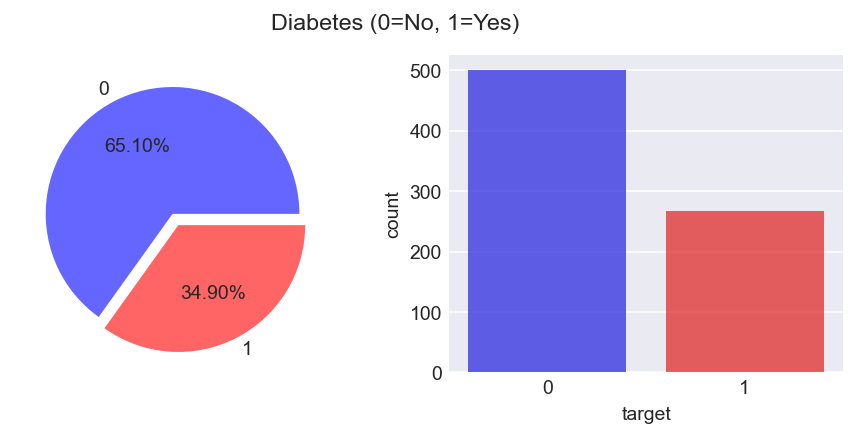

In [8]:
fig,ax=plt.subplots(1,2, figsize=(8,3), dpi=140)

ax[0].pie(df.target.value_counts(), explode=[0,0.1], autopct='%1.2f%%', colors=('blue','red') , wedgeprops = {"alpha": 0.6}, labels=(0,1) )
ax[0].set_ylabel('')

sns.countplot(x='target', data=df, alpha=0.7, ax=ax[1], palette={0:'blue', 1:'red'} )

plt.suptitle('Diabetes (0=No, 1=Yes)')
plt.show()

### ***seems like we have an IMBALANCED class problem***

## **UNIVARIATE ANALYSIS**

### analysing numerical features  

In [9]:
#Extracting numerical column names
cols_num=list(df.columns)
cols_num.remove('target')

				ANALYSIS OF: Pregnancies 

5 point summary for: Pregnancies
     Pregnancies
min          0.0
25%          1.0
50%          3.0
75%          6.0
max         17.0
---------------------------------
OUTLIERS in Pregnancies via Z score

Outlier limits:
lower limit: -6.257098753893652 
upper limit: 13.94720292056032

Total outliers: 4
     outliers   Z-score
298        14  3.015679
455        14  3.015679
88         15  3.312645
159        17  3.906578
---------------------------------
OUTLIERS in Pregnancies via IQR

Outlier limits:
lower limit: -6.5 
upper limit: 13.5

Total outliers: 4
298    14
455    14
88     15
159    17
Name: Pregnancies, dtype: int64
---------------------------------


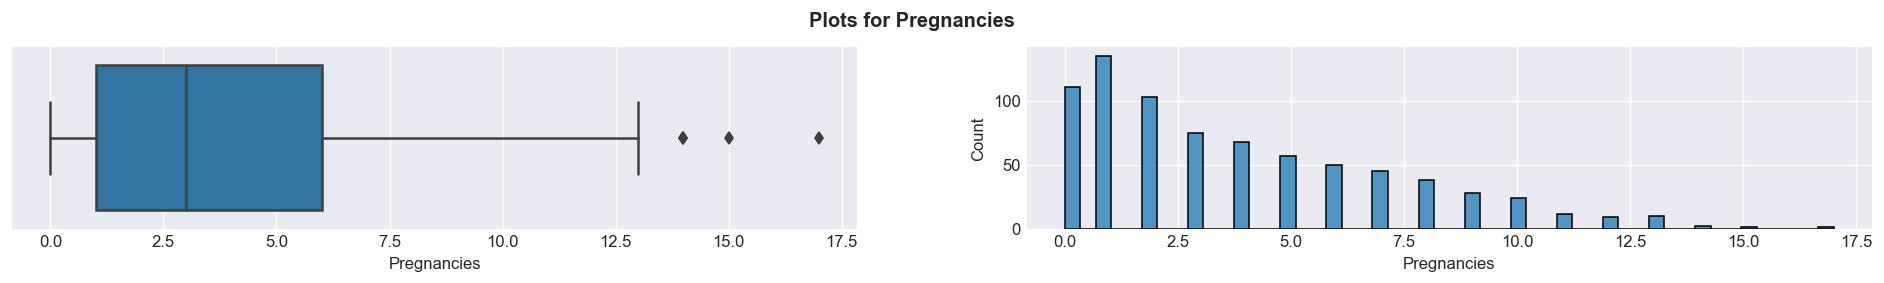

___________________________________________________________________________________________________________
				ANALYSIS OF: Glucose 

5 point summary for: Glucose
     Glucose
min     0.00
25%    99.00
50%   117.00
75%   140.25
max   199.00
---------------------------------
OUTLIERS in Glucose via Z score

Outlier limits:
lower limit: 25.039143525391836 
upper limit: 216.74991897460816

Total outliers: 5
     outliers   Z-score
75          0 -3.783654
182         0 -3.783654
342         0 -3.783654
349         0 -3.783654
502         0 -3.783654
---------------------------------
OUTLIERS in Glucose via IQR

Outlier limits:
lower limit: 37.125 
upper limit: 202.125

Total outliers: 5
75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64
---------------------------------


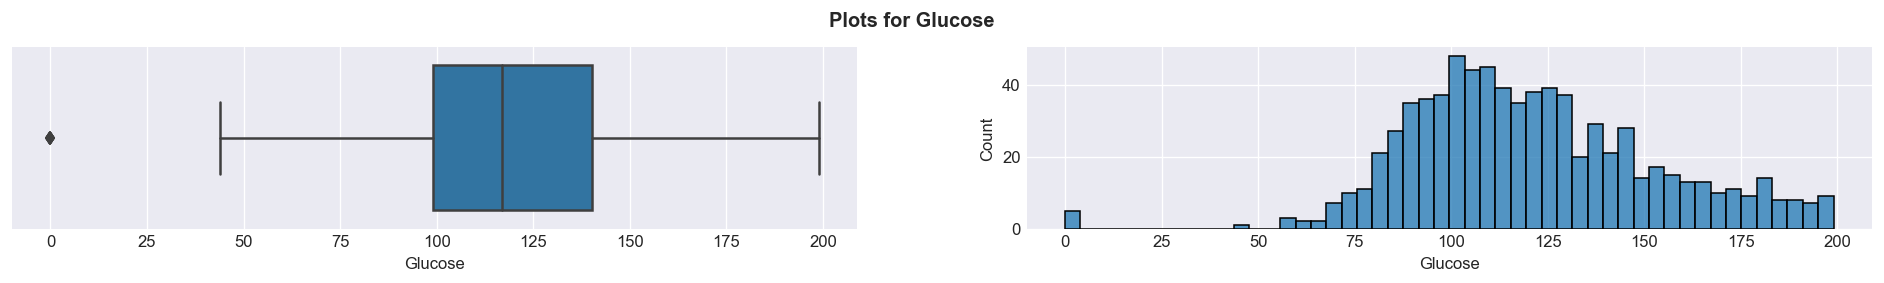

___________________________________________________________________________________________________________
				ANALYSIS OF: BloodPressure 

5 point summary for: BloodPressure
     BloodPressure
min            0.0
25%           62.0
50%           72.0
75%           80.0
max          122.0
---------------------------------
OUTLIERS in BloodPressure via Z score

Outlier limits:
lower limit: 11.075863863054913 
upper limit: 127.1350736369451

Total outliers: 35
     outliers   Z-score
7           0 -3.572597
435         0 -3.572597
453         0 -3.572597
468         0 -3.572597
484         0 -3.572597 
.
.
     outliers   Z-score
300         0 -3.572597
332         0 -3.572597
336         0 -3.572597
222         0 -3.572597
706         0 -3.572597
---------------------------------
OUTLIERS in BloodPressure via IQR

Outlier limits:
lower limit: 35.0 
upper limit: 107.0

Total outliers: 45
     BloodPressure
7                0
703              0
426              0
430              0
435   

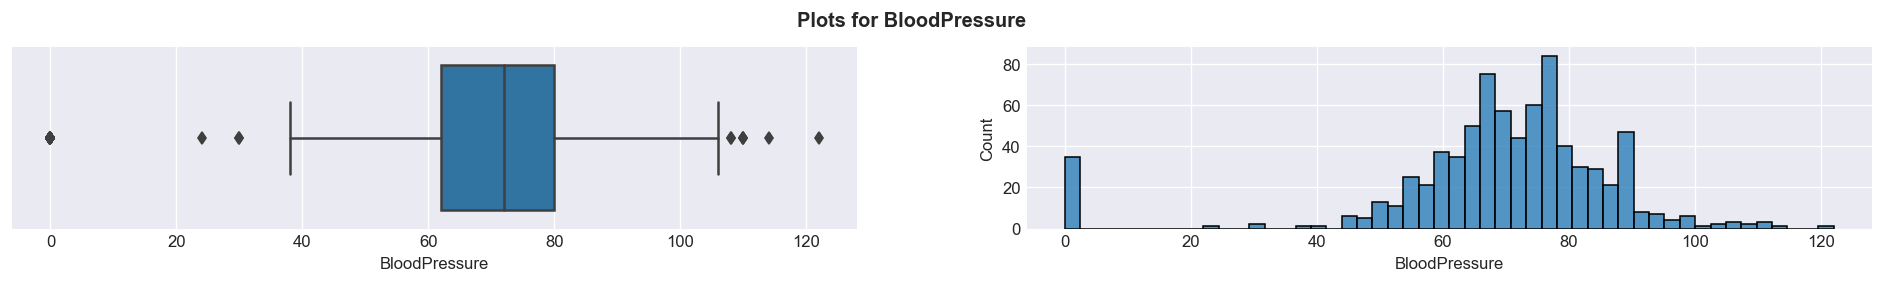

___________________________________________________________________________________________________________
				ANALYSIS OF: SkinThickness 

5 point summary for: SkinThickness
     SkinThickness
min            0.0
25%            0.0
50%           23.0
75%           32.0
max           99.0
---------------------------------
OUTLIERS in SkinThickness via Z score

Outlier limits:
lower limit: -27.28902754615748 
upper limit: 68.36194421282414

Total outliers: 1
     outliers   Z-score
579        99  4.921866
---------------------------------
OUTLIERS in SkinThickness via IQR

Outlier limits:
lower limit: -48.0 
upper limit: 80.0

Total outliers: 1
579    99
Name: SkinThickness, dtype: int64
---------------------------------


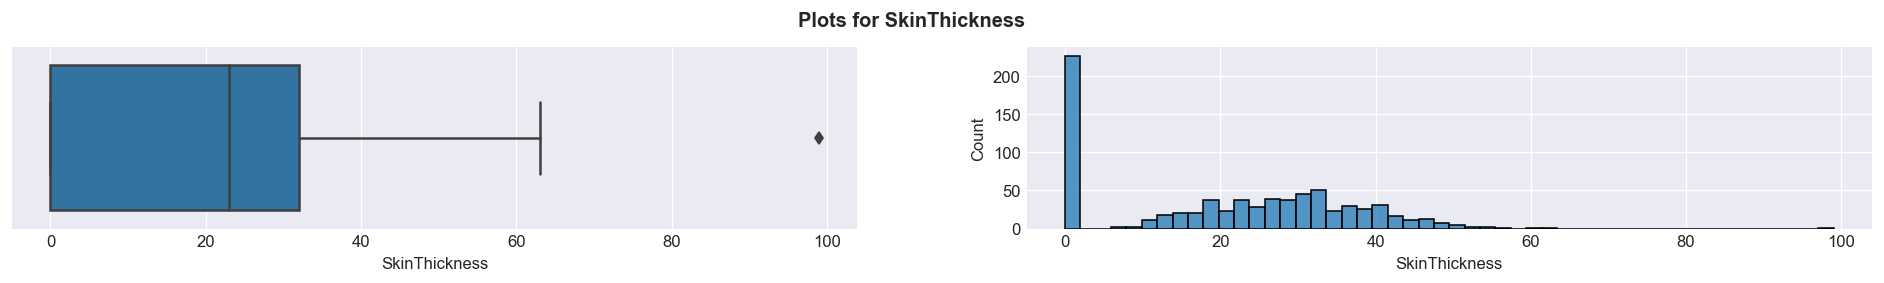

___________________________________________________________________________________________________________
				ANALYSIS OF: Insulin 

5 point summary for: Insulin
     Insulin
min     0.00
25%     0.00
50%    30.50
75%   127.25
max   846.00
---------------------------------
OUTLIERS in Insulin via Z score

Outlier limits:
lower limit: -265.7073686273512 
upper limit: 425.30632696068454

Total outliers: 18
     outliers   Z-score
645       440  3.127584
370       465  3.344656
415       474  3.422802
220       478  3.457534
486       480  3.474899 
.
.
     outliers   Z-score
409       579  4.334506
584       600  4.516847
247       680  5.211479
228       744  5.767184
13        846  6.652839
---------------------------------
OUTLIERS in Insulin via IQR

Outlier limits:
lower limit: -190.875 
upper limit: 318.125

Total outliers: 34
     Insulin
612      321
139      325
375      325
360      325
519      326 
.
.
     Insulin
409      579
584      600
247      680
228      744
13    

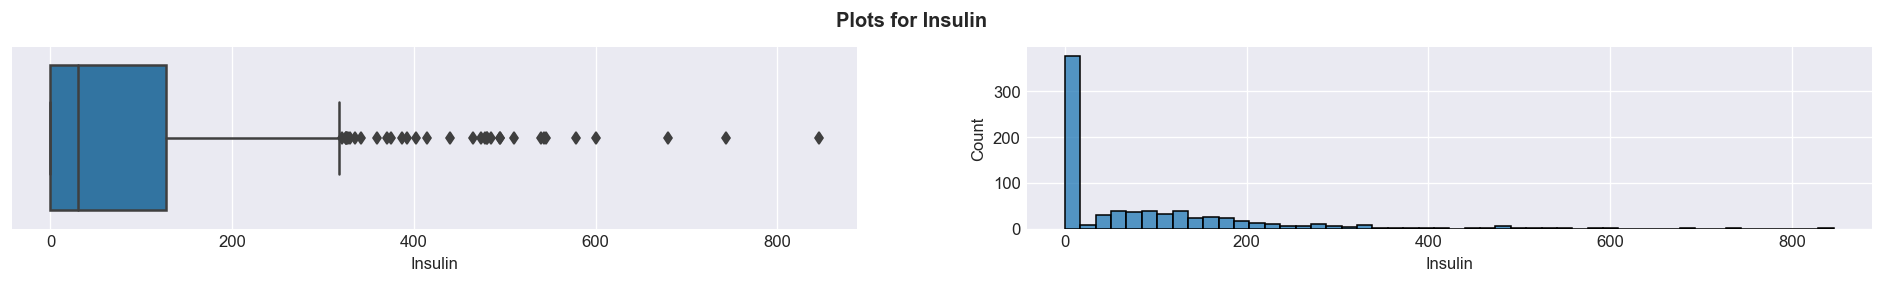

___________________________________________________________________________________________________________
				ANALYSIS OF: BMI 

5 point summary for: BMI
      BMI
min   0.0
25%  27.3
50%  32.0
75%  36.6
max  67.1
---------------------------------
OUTLIERS in BMI via Z score

Outlier limits:
lower limit: 8.355500930379609 
upper limit: 55.62965531962038

Total outliers: 14
     outliers   Z-score
9         0.0 -4.060474
49        0.0 -4.060474
60        0.0 -4.060474
81        0.0 -4.060474
145       0.0 -4.060474 
.
.
     outliers   Z-score
684       0.0 -4.060474
706       0.0 -4.060474
673      57.3  3.211999
445      59.4  3.478529
177      67.1  4.455807
---------------------------------
OUTLIERS in BMI via IQR

Outlier limits:
lower limit: 13.35 
upper limit: 50.550000000000004

Total outliers: 19
     BMI
9    0.0
522  0.0
494  0.0
426  0.0
371  0.0 
.
.
      BMI
120  53.2
125  55.0
673  57.3
445  59.4
177  67.1
---------------------------------


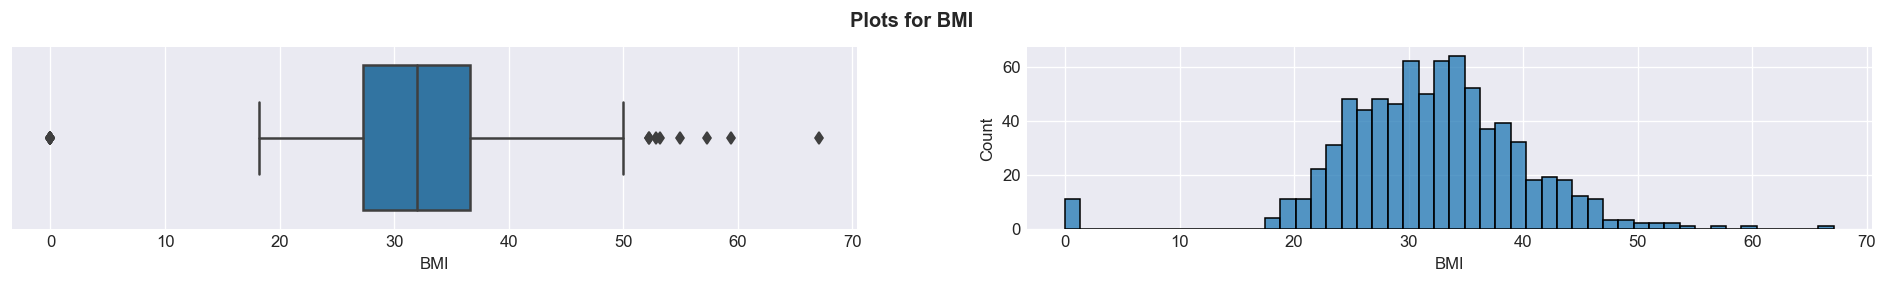

___________________________________________________________________________________________________________
				ANALYSIS OF: DiabetesPedigreeFunction 

5 point summary for: DiabetesPedigreeFunction
     DiabetesPedigreeFunction
min                   0.07800
25%                   0.24375
50%                   0.37250
75%                   0.62625
max                   2.42000
---------------------------------
OUTLIERS in DiabetesPedigreeFunction via Z score

Outlier limits:
lower limit: -0.5214621460025539 
upper limit: 1.4652147501692205

Total outliers: 11
     outliers   Z-score
330     1.476  3.032573
395     1.600  3.407067
621     1.698  3.703039
593     1.699  3.706059
371     1.731  3.802703 
.
.
     outliers   Z-score
45      1.893  4.291962
370     2.137  5.028871
4       2.288  5.484909
228     2.329  5.608734
445     2.420  5.883565
---------------------------------
OUTLIERS in DiabetesPedigreeFunction via IQR

Outlier limits:
lower limit: -0.32999999999999996 
upper limit:

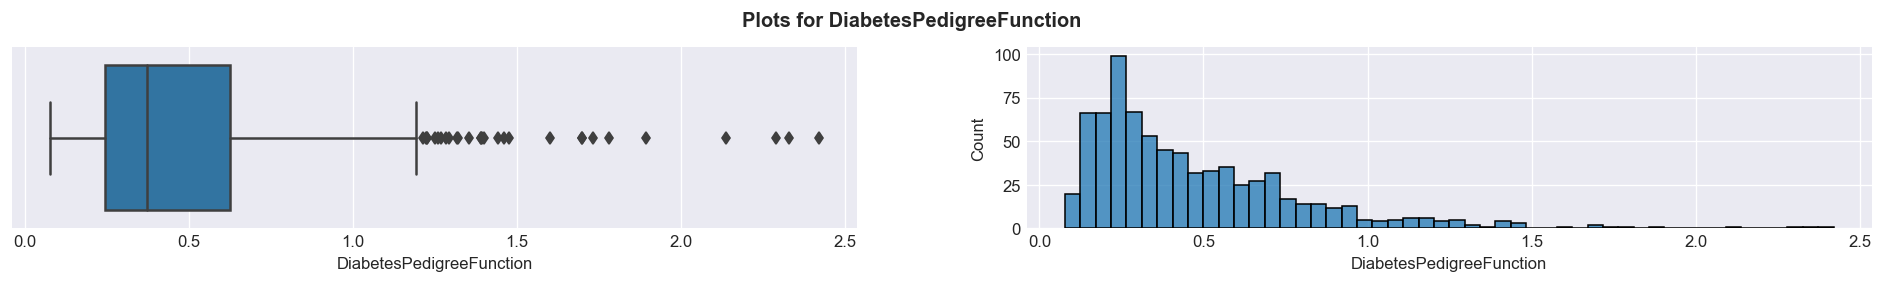

___________________________________________________________________________________________________________
				ANALYSIS OF: Age 

5 point summary for: Age
      Age
min  21.0
25%  24.0
50%  29.0
75%  41.0
max  81.0
---------------------------------
OUTLIERS in Age via Z score

Outlier limits:
lower limit: -2.0168325213158838 
upper limit: 68.49860335464922

Total outliers: 5
     outliers   Z-score
123        69  3.042663
684        69  3.042663
666        70  3.127750
453        72  3.297926
459        81  4.063716
---------------------------------
OUTLIERS in Age via IQR

Outlier limits:
lower limit: -1.5 
upper limit: 66.5

Total outliers: 9
363    67
489    67
537    67
674    68
123    69
684    69
666    70
453    72
459    81
Name: Age, dtype: int64
---------------------------------


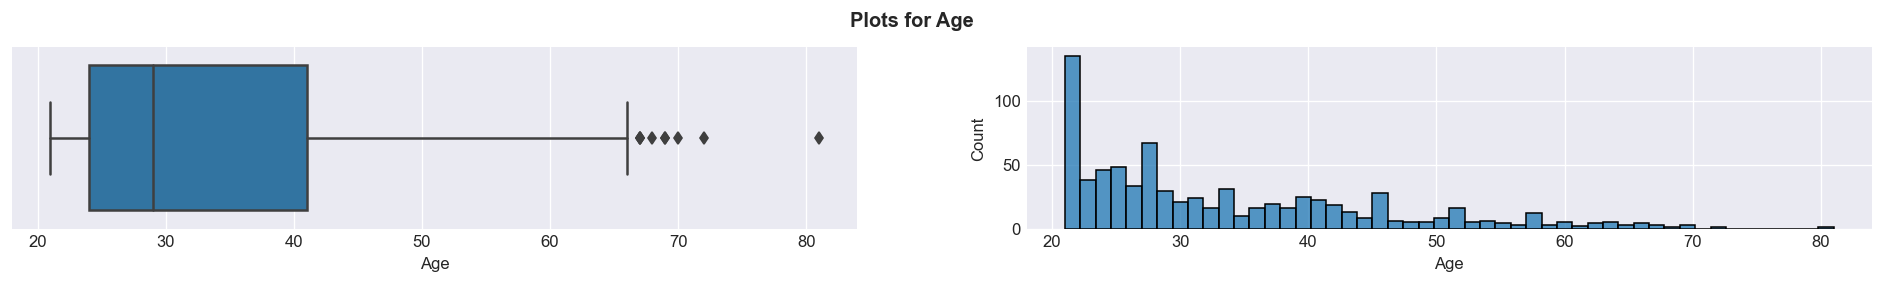

___________________________________________________________________________________________________________


In [10]:
analysis_quant(df, cols_num, figsize=(20,2), dpi=120)

### ***distribution doesn't seem to be normal for some features***

#### Some features like glucose, blood pressure, skinthickness, insulin, bmi have values like '0' that is invalid. Hence we can treat those as NA and fill something else like mean or median for the respective features

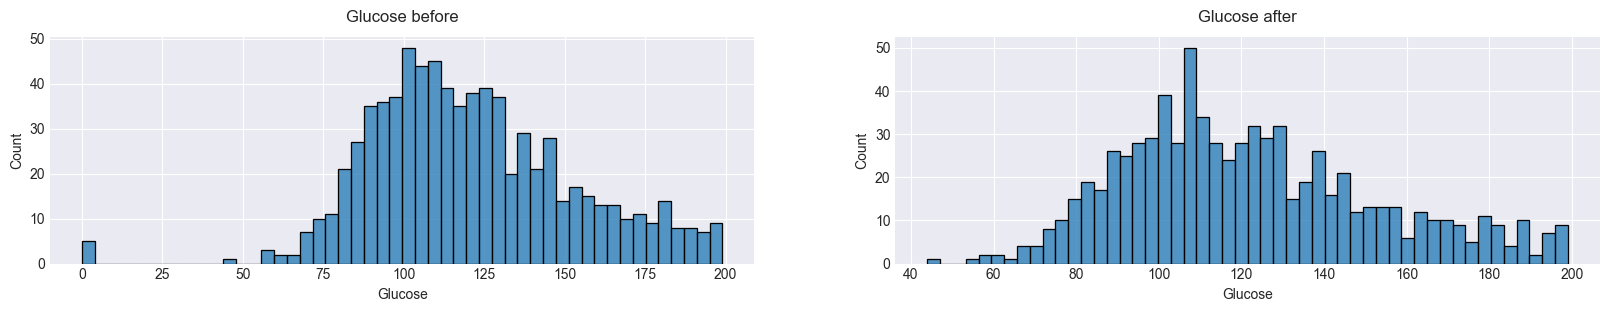

_____________________________________________________________________________________________________________________


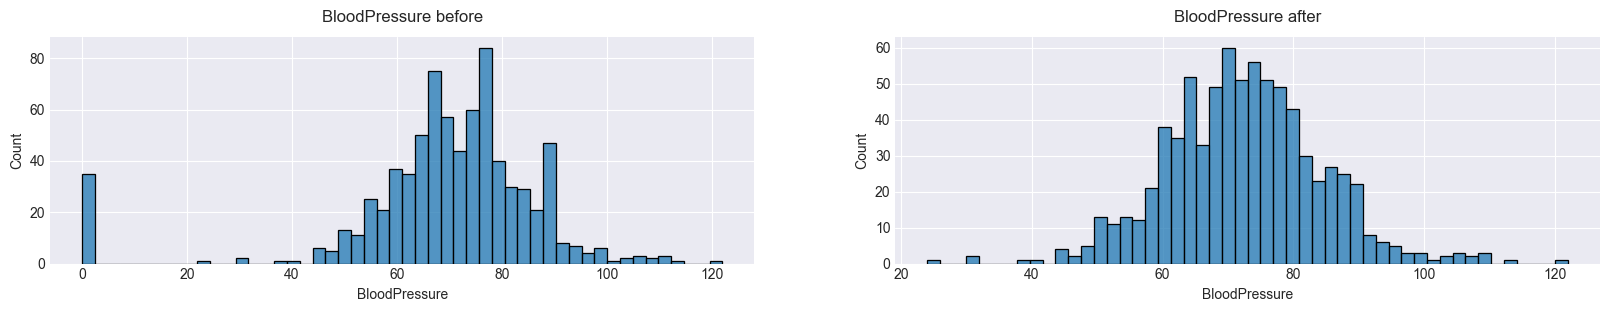

_____________________________________________________________________________________________________________________


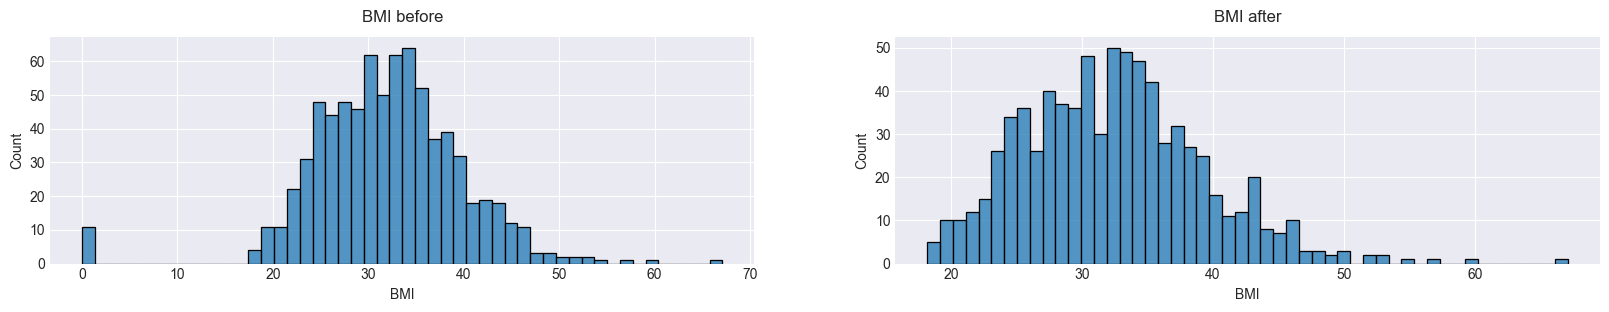

_____________________________________________________________________________________________________________________


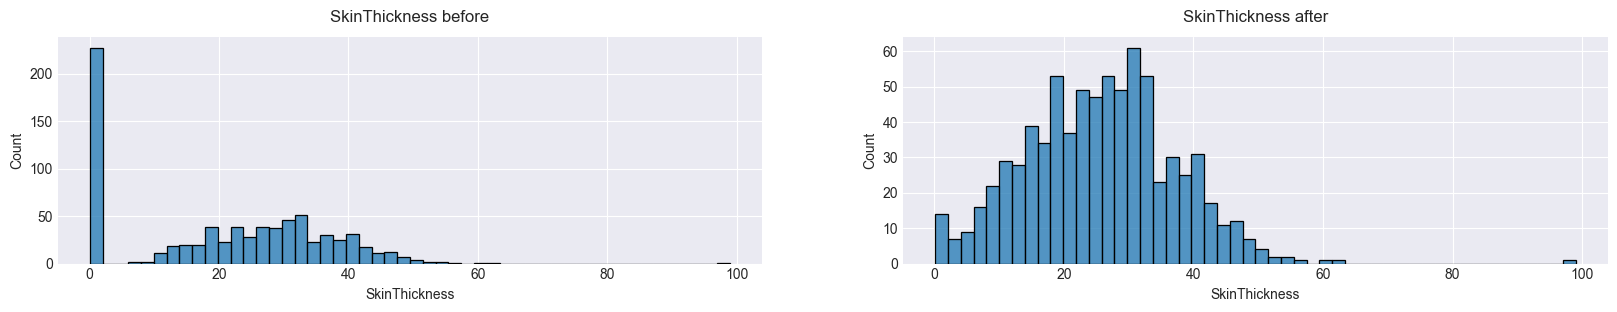

_____________________________________________________________________________________________________________________


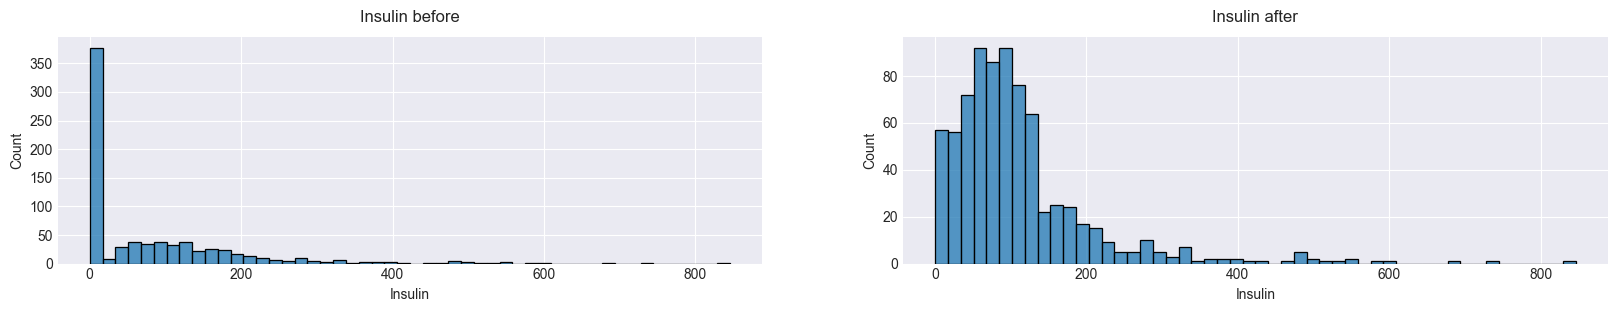

_____________________________________________________________________________________________________________________


In [11]:
replacement_list = ['Glucose', 'BloodPressure', 'BMI', 'SkinThickness', 'Insulin']
replacement_dict= {ele:0 for ele in replacement_list}

# USING MY CUSTOM FUNCTION IMPORTED FROM "quick_EDA" module
# this function is replacing the value "0" with a random value in IQR range 
iqr_impute(df, replacement_dict)

### SkinThickness,DiabetesPedigreeFunction,Insulin features seems to have an absurd outlier, it is good to handle it.

Compressed the following outliers in SkinThickness:

Total outliers: 3
     outliers   Z-score
57       60.0  3.001561
445      63.0  3.262443
579      99.0  6.393031


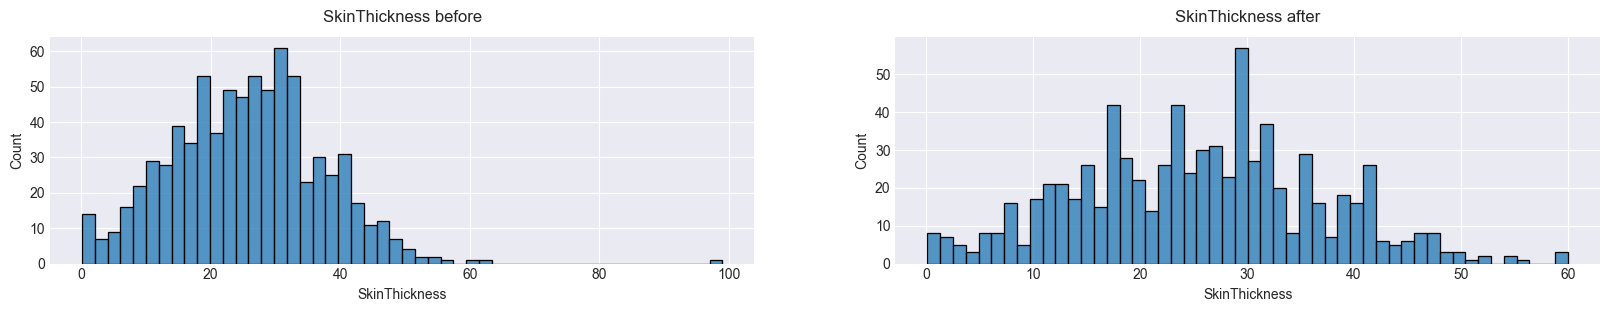

_____________________________________________________________________________________________________________________
Compressed the following outliers in DiabetesPedigreeFunction:

Total outliers: 11
     outliers   Z-score
330     1.476  3.032573
395     1.600  3.407067
621     1.698  3.703039
593     1.699  3.706059
371     1.731  3.802703 
.
.
     outliers   Z-score
45      1.893  4.291962
370     2.137  5.028871
4       2.288  5.484909
228     2.329  5.608734
445     2.420  5.883565


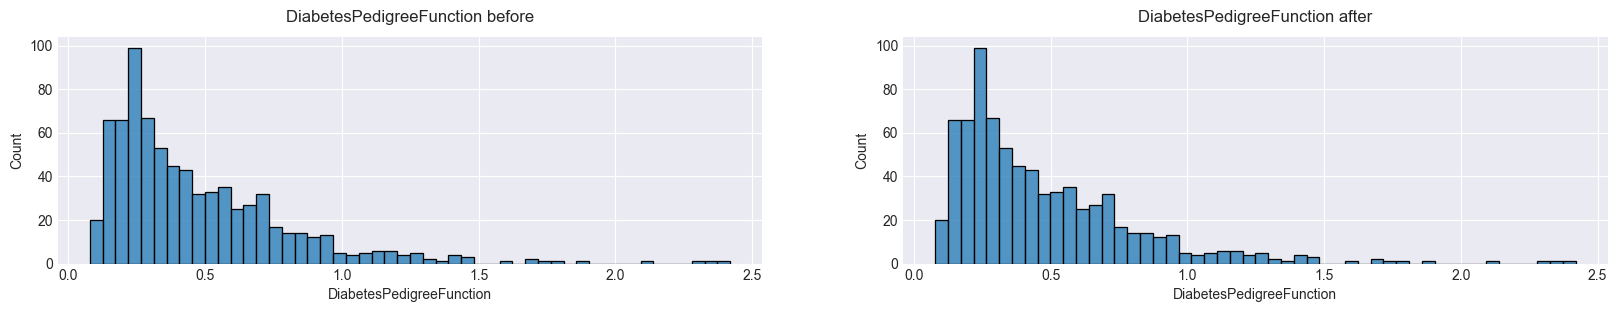

_____________________________________________________________________________________________________________________
Compressed the following outliers in Insulin:

Total outliers: 19
     outliers   Z-score
392     415.0  3.044060
645     440.0  3.294157
370     465.0  3.544253
415     474.0  3.634288
220     478.0  3.674304 
.
.
     outliers   Z-score
409     579.0  4.684694
584     600.0  4.894775
247     680.0  5.695084
228     744.0  6.335331
13      846.0  7.355725


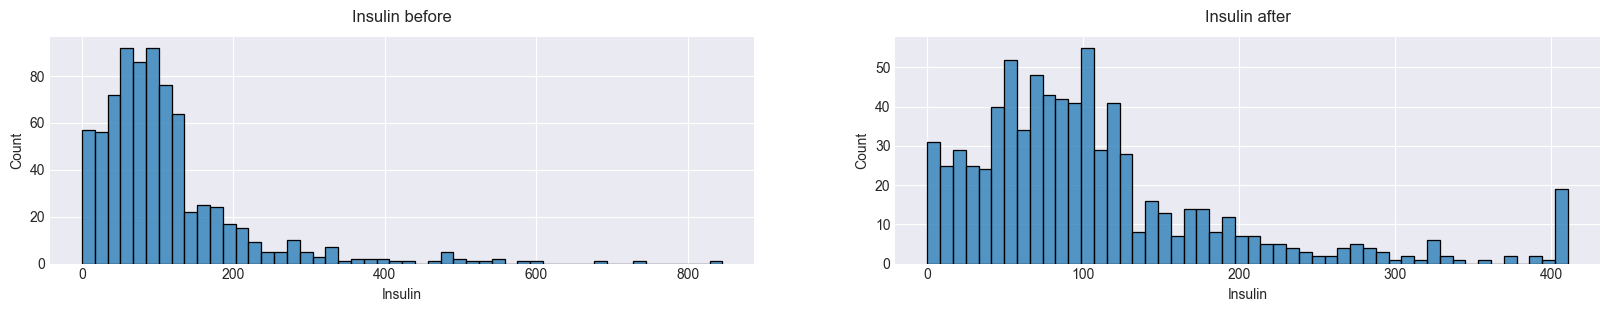

_____________________________________________________________________________________________________________________


In [12]:
# compressing the outliers using Z score
handle_outliers(df, ['SkinThickness','DiabetesPedigreeFunction','Insulin'])

### Checking distribution of features after outlier handling

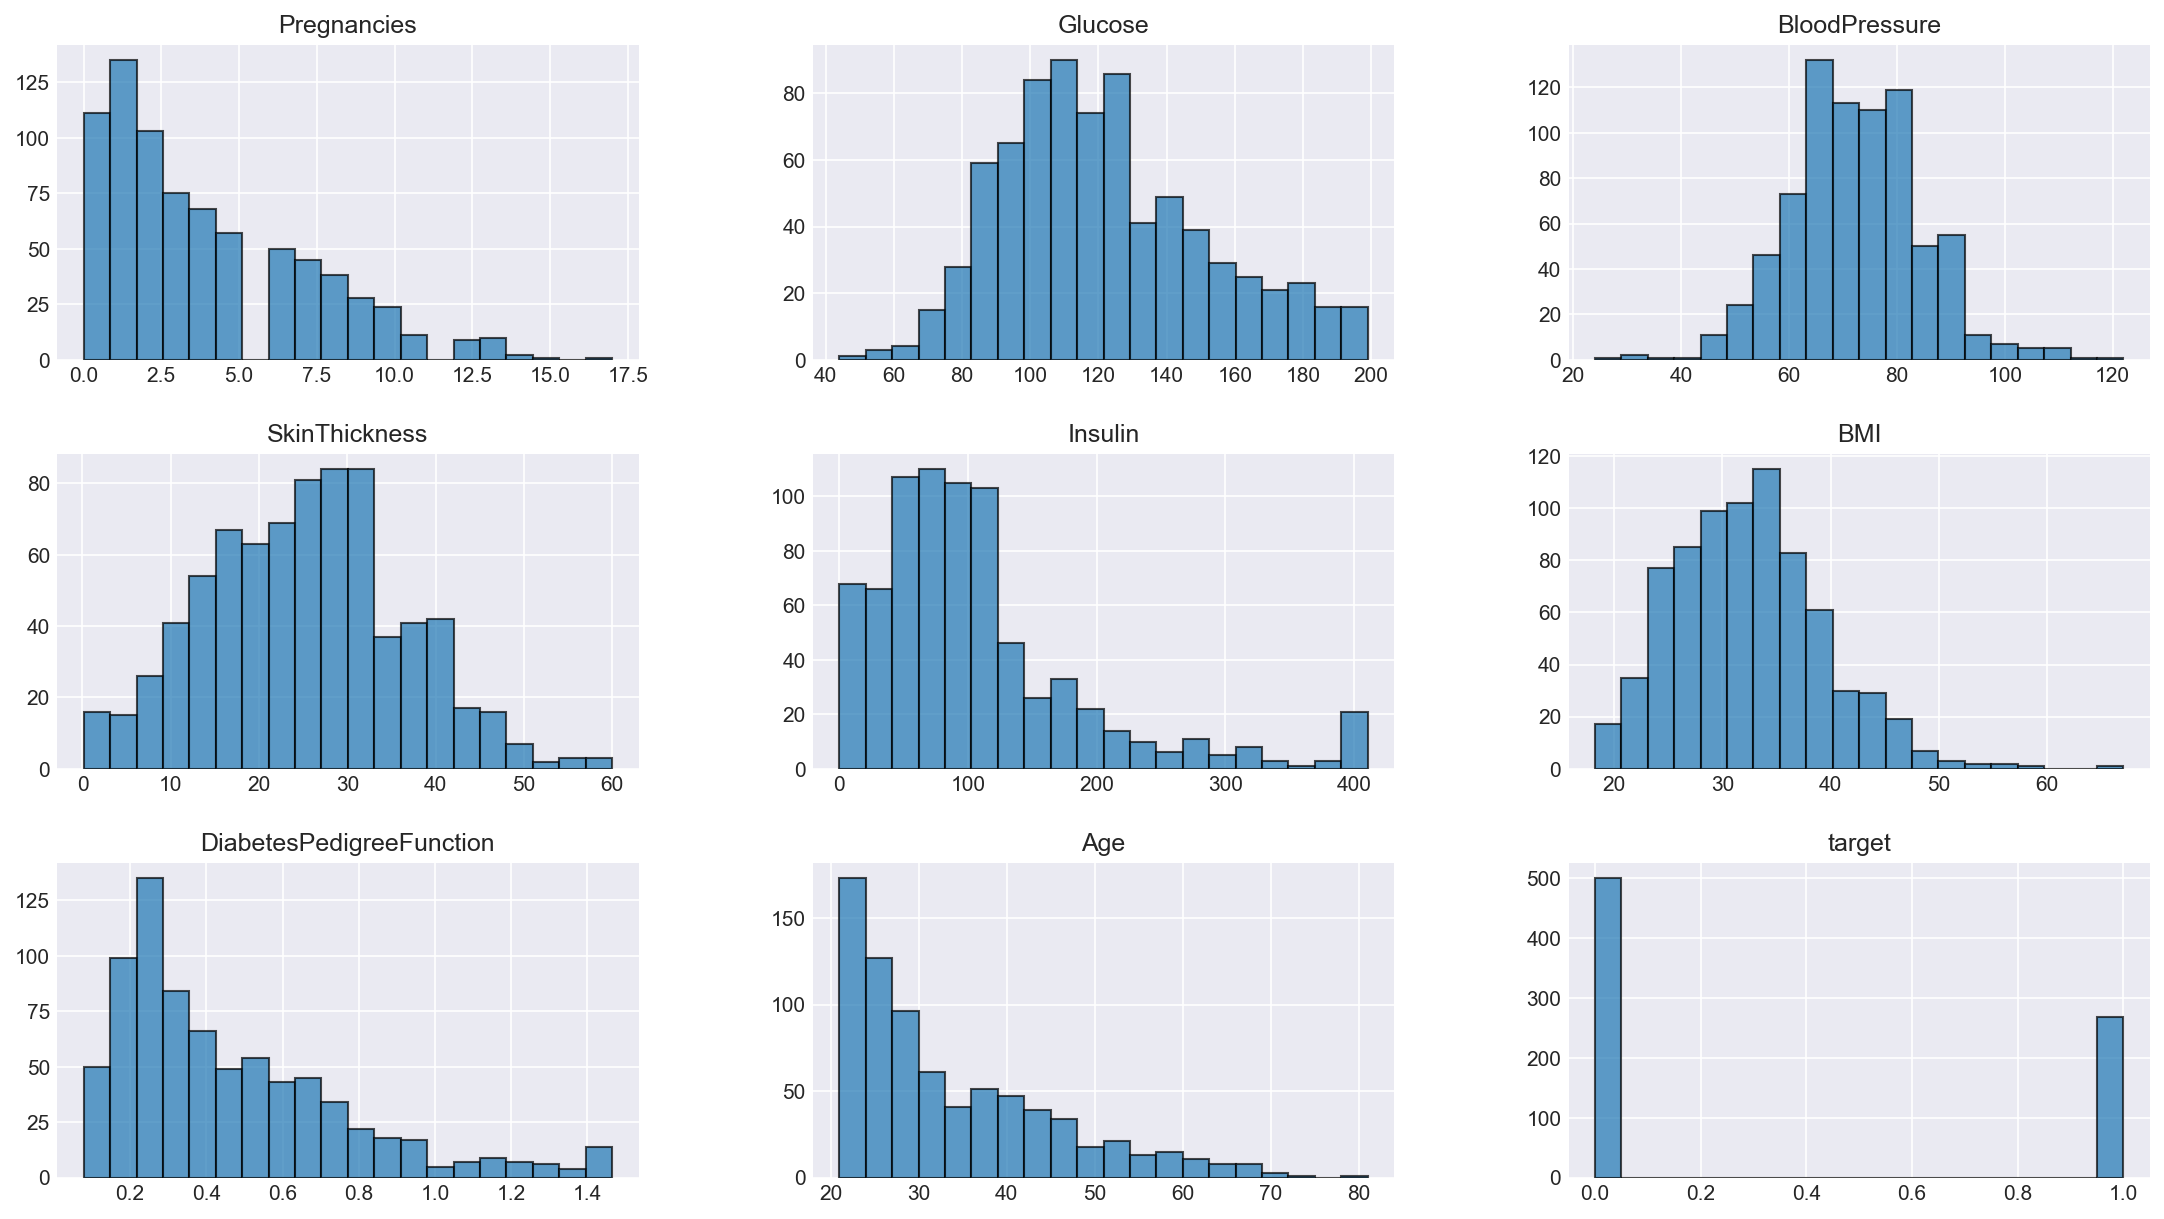

In [13]:
fig, ax=plt.subplots(figsize=(18,10), dpi=150)
df.hist(ax=ax, bins=20, alpha=0.7, edgecolor='black')
plt.show()

    Now most of the distributions look like normal distribution.
    Some features like DiabetesPedigreeFunction and Age seem to follow exponential distribution.
    Pregnancies is a discreet feature. 

## **BIVARIATE ANALYSIS**

### Correlation between features

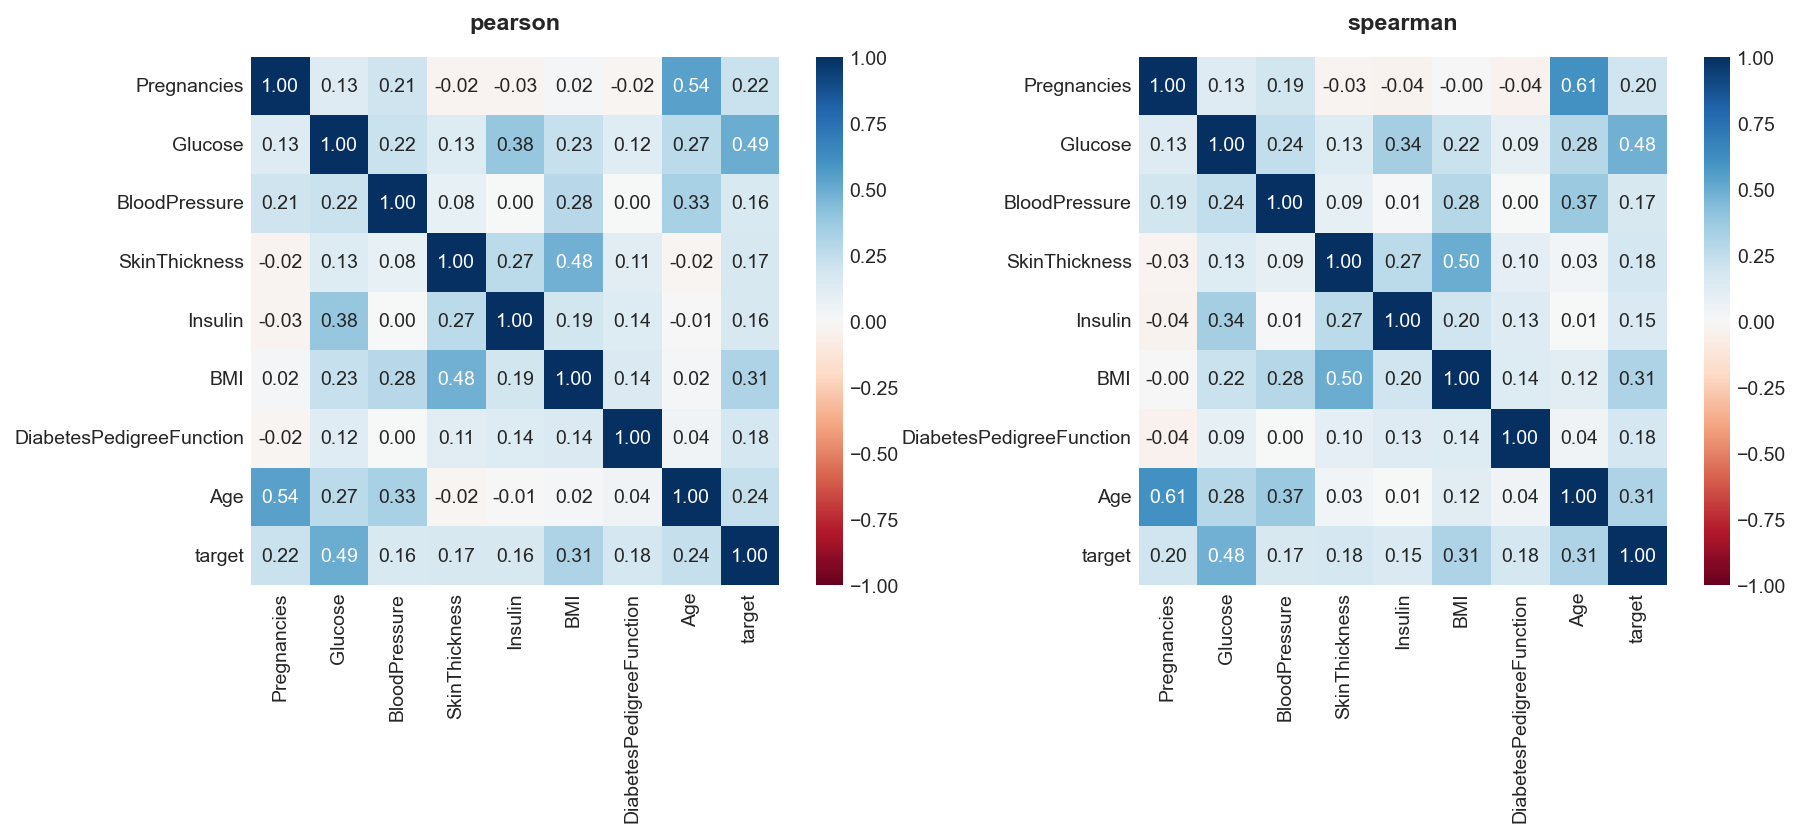

In [14]:
correlation(df, figsize=(15,5), dpi=140)

### Mild correlations:
+ Pregnancies and age 
+ Target and glucose
+ BMI and skinthickness

### Plotting pairwise scatter plot

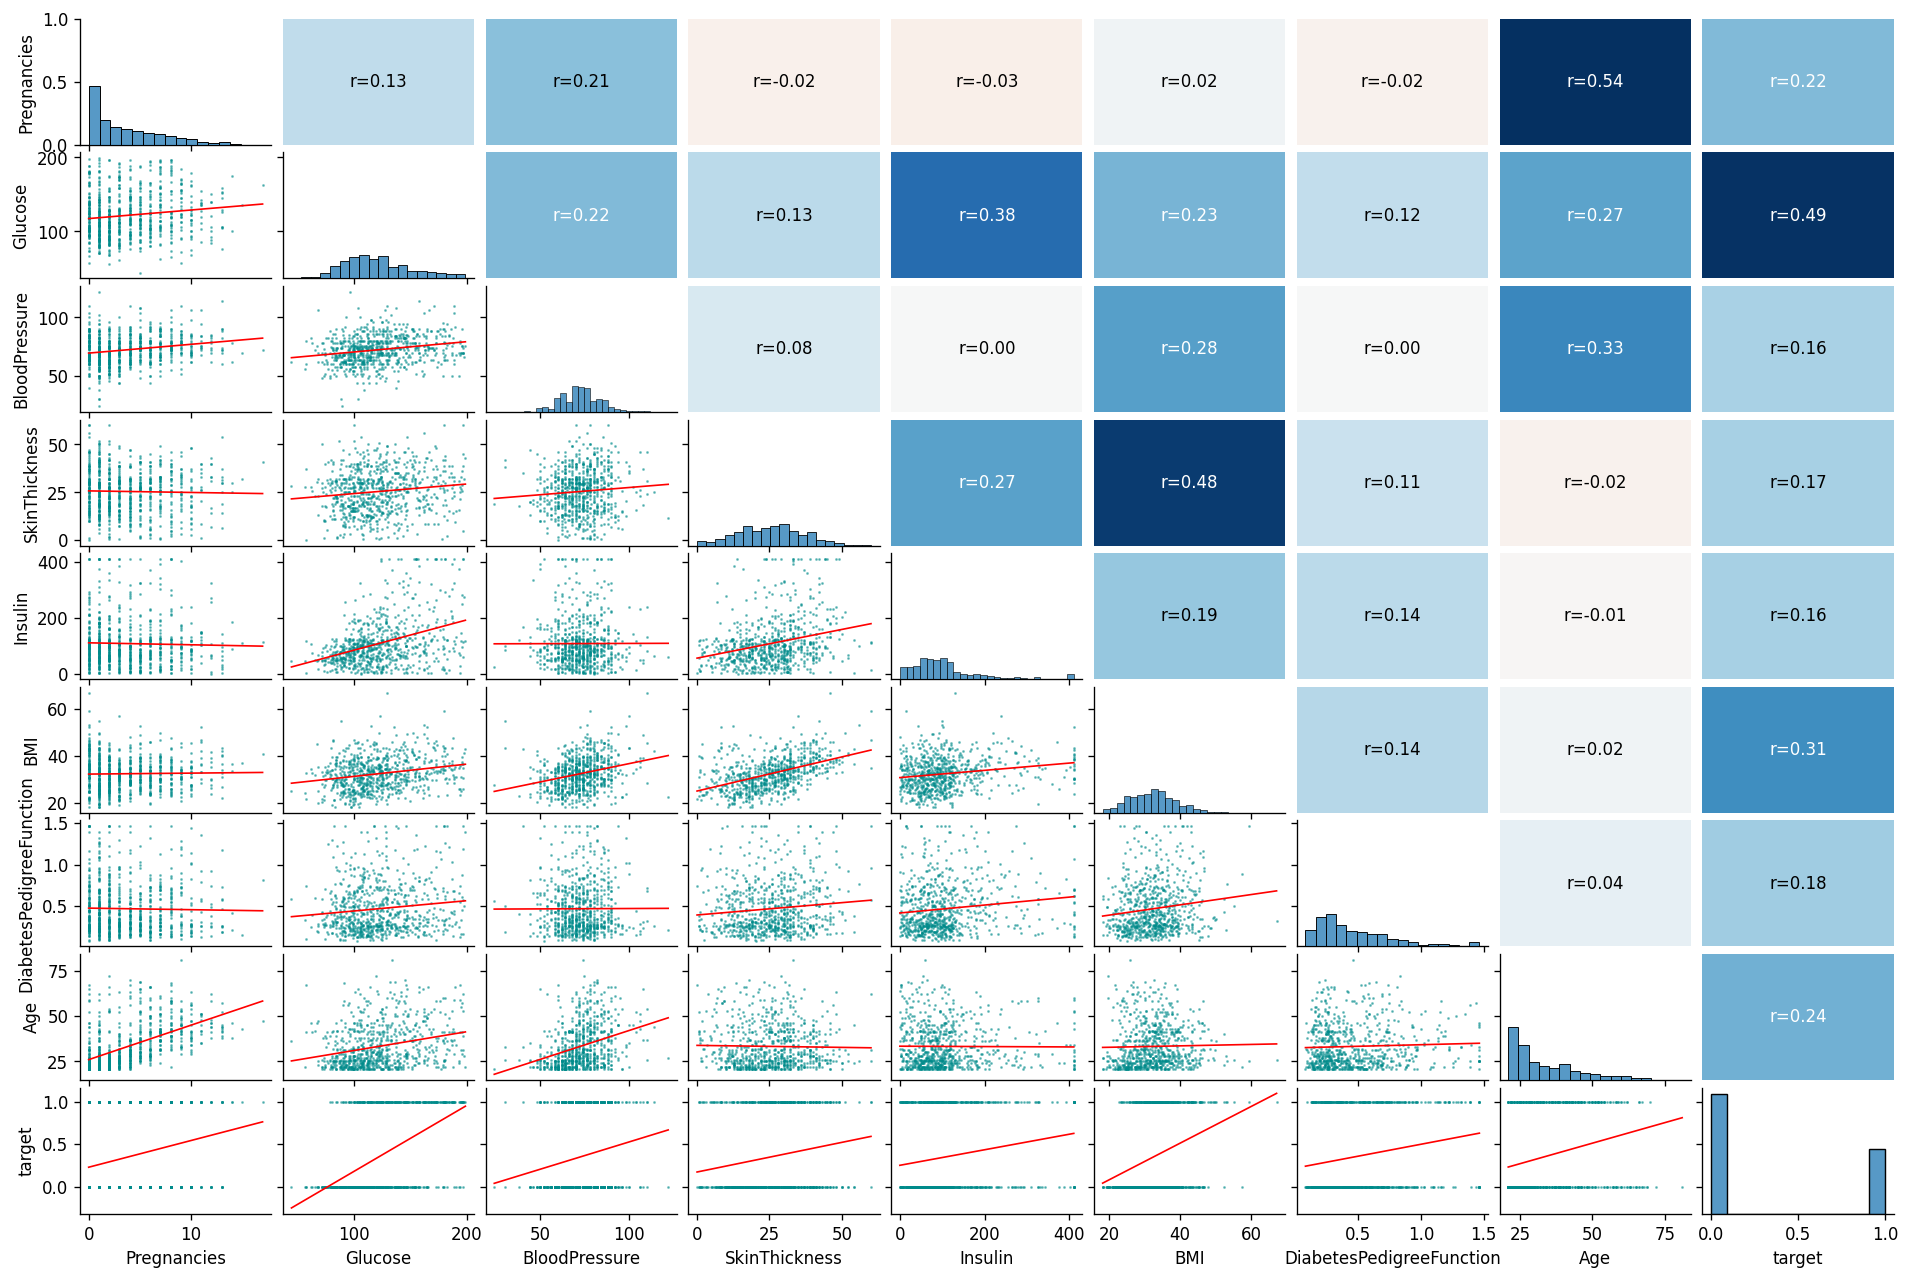

In [15]:
multiplot(df, height=1.2, dpi=120)

### Plotting Mutual Information

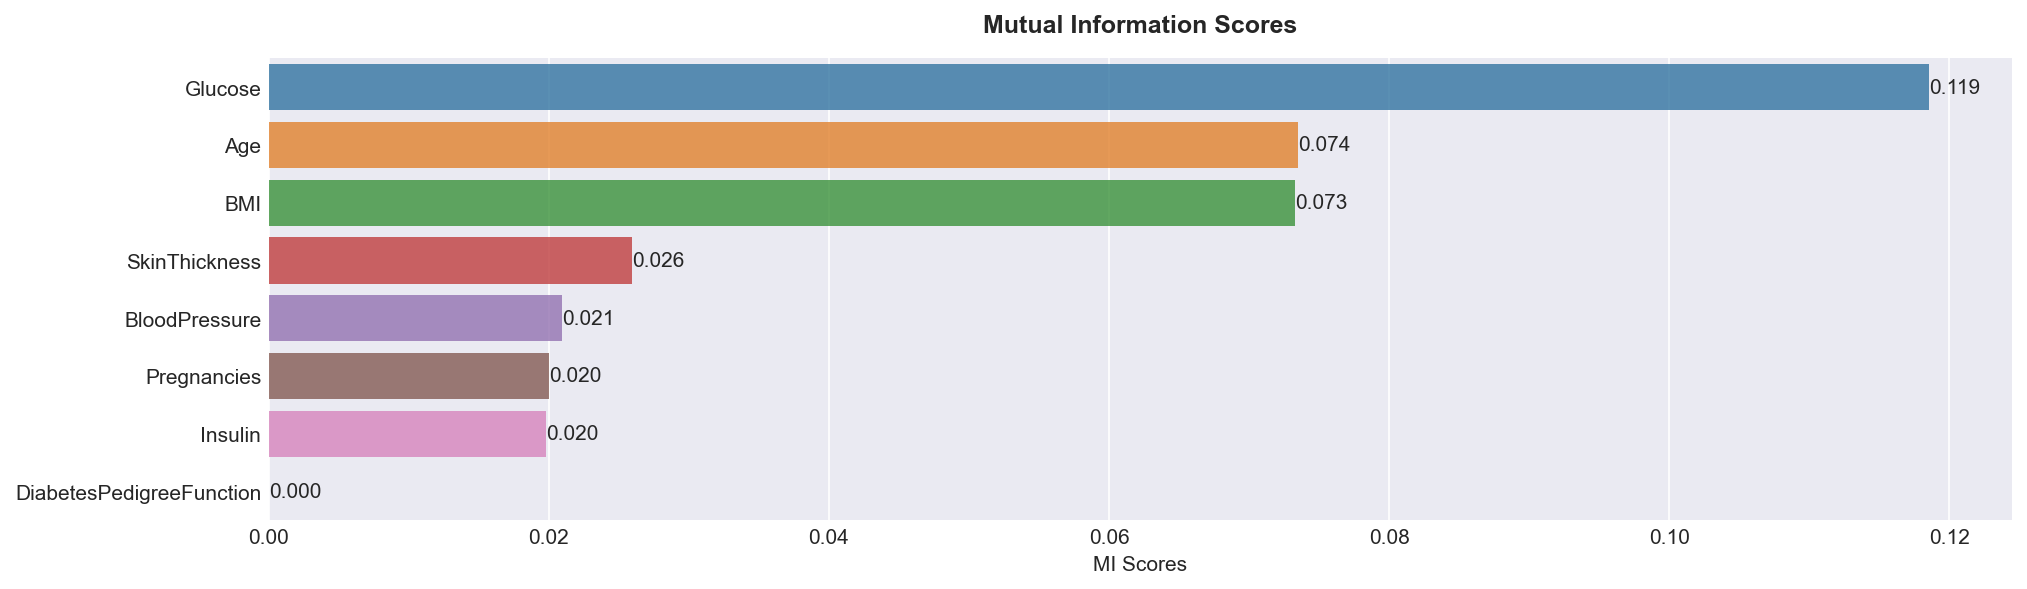

In [16]:
mutual_info(df, 'target')

### ***We can see that glucose gives the highest information about target as compared to others***

### analysing Pregnancy as discrete feature 

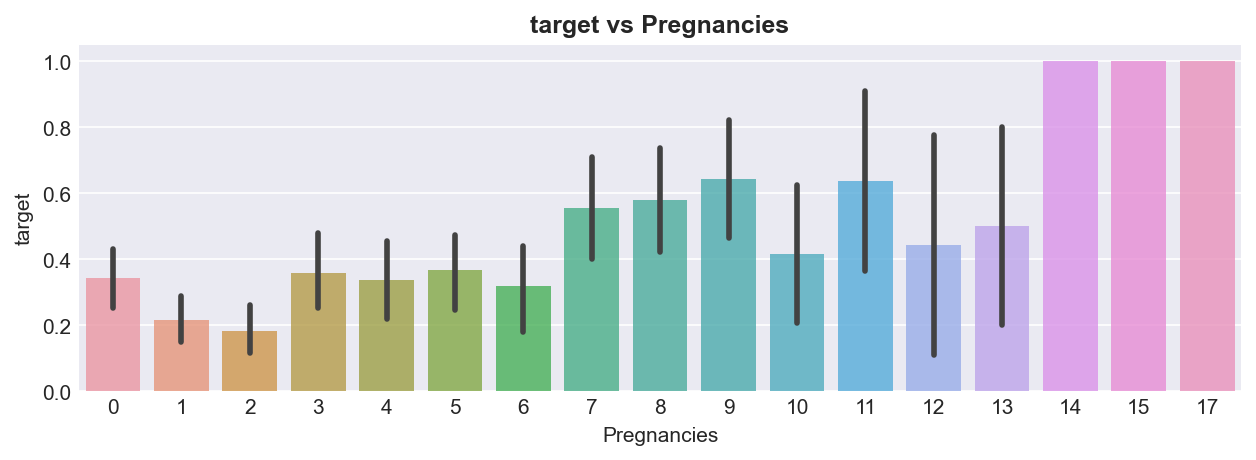

In [17]:
plt.figure(figsize=(10,3), dpi=150)
plt.title(f'target vs Pregnancies', fontweight='bold')
sns.barplot(x='Pregnancies', y="target", data=df, estimator=np.mean, alpha=0.8 )
plt.show()

### ***seems like people with 14 pregnancies and higher have 100% chance of diabetes***
### ***this may be due to less data points in that range***

## **Multivariate analysis**

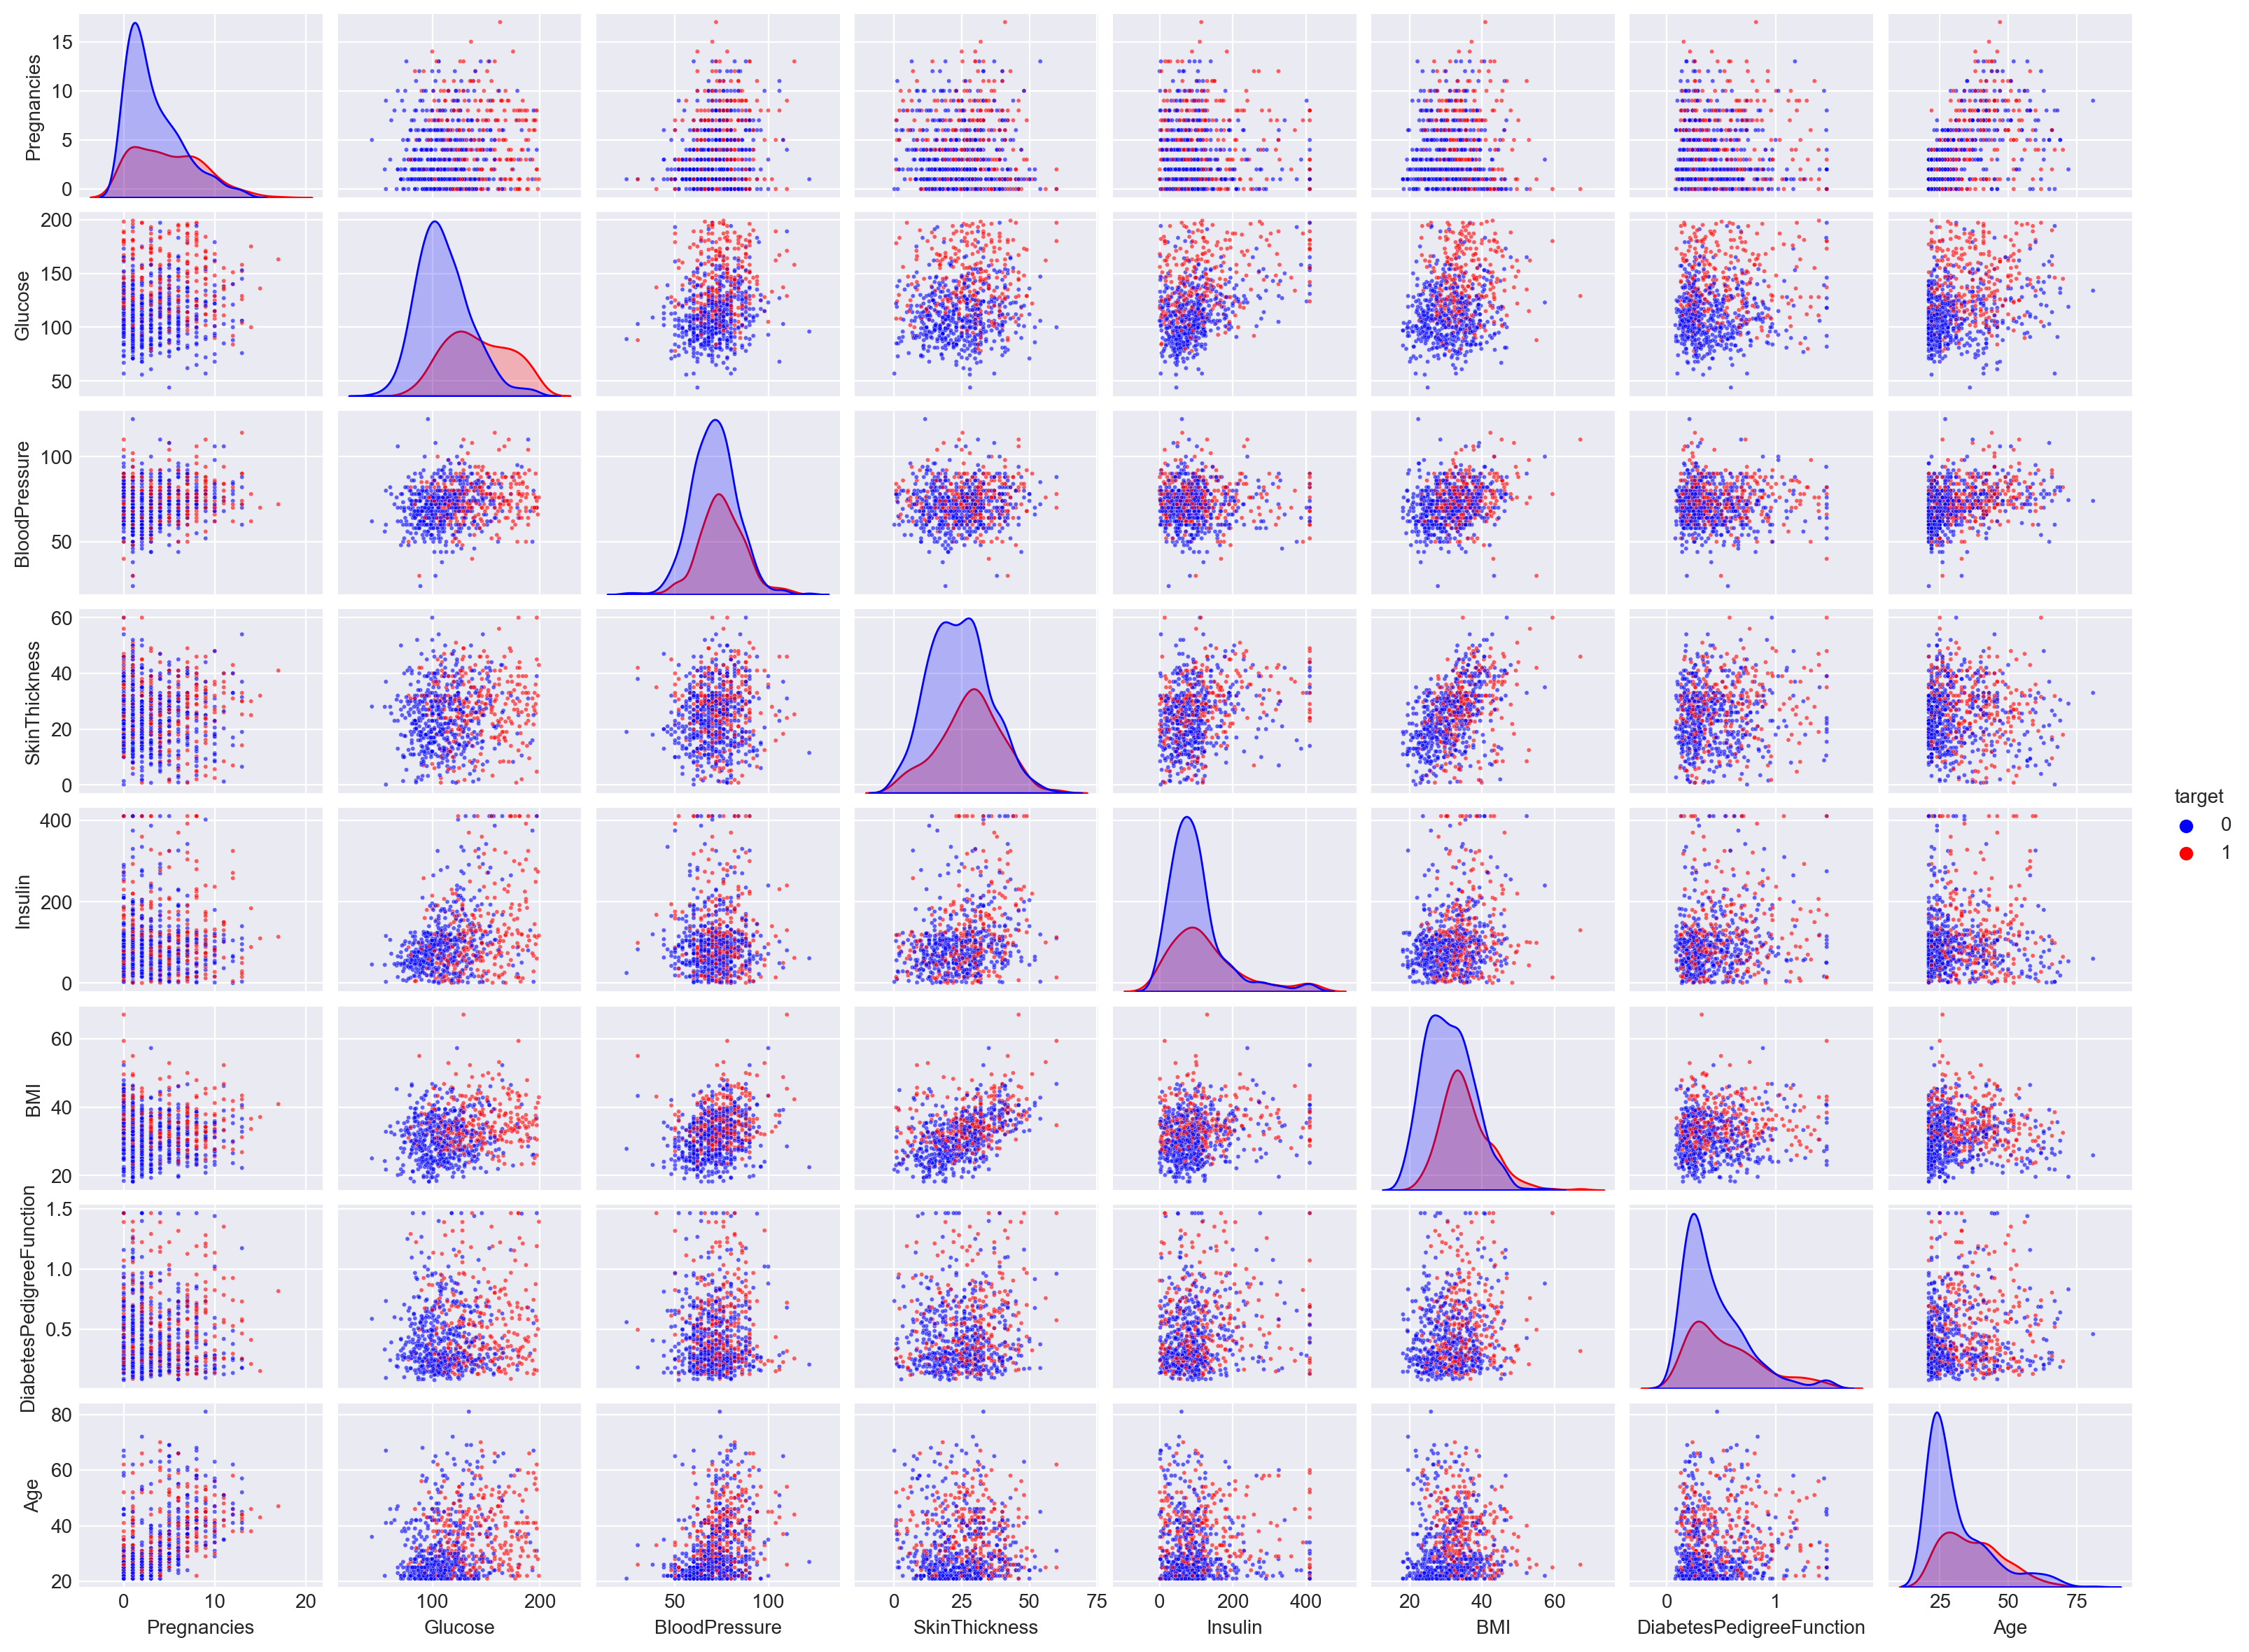

In [18]:
sns.pairplot(
    df,
    hue='target', 
    aspect=1.3, height=1.5, plot_kws={'s':5, 'alpha':0.6}, palette={0:'blue', 1:'red'}  # height=2,
).fig.dpi=200

plt.show()

### ***Glucose shows the most separation between target as compared to other features***
### ***Clearly looks like people with high glucose levels had higher chances of diabetes***

### The most visible separation between target classes is in Glucose vs Age

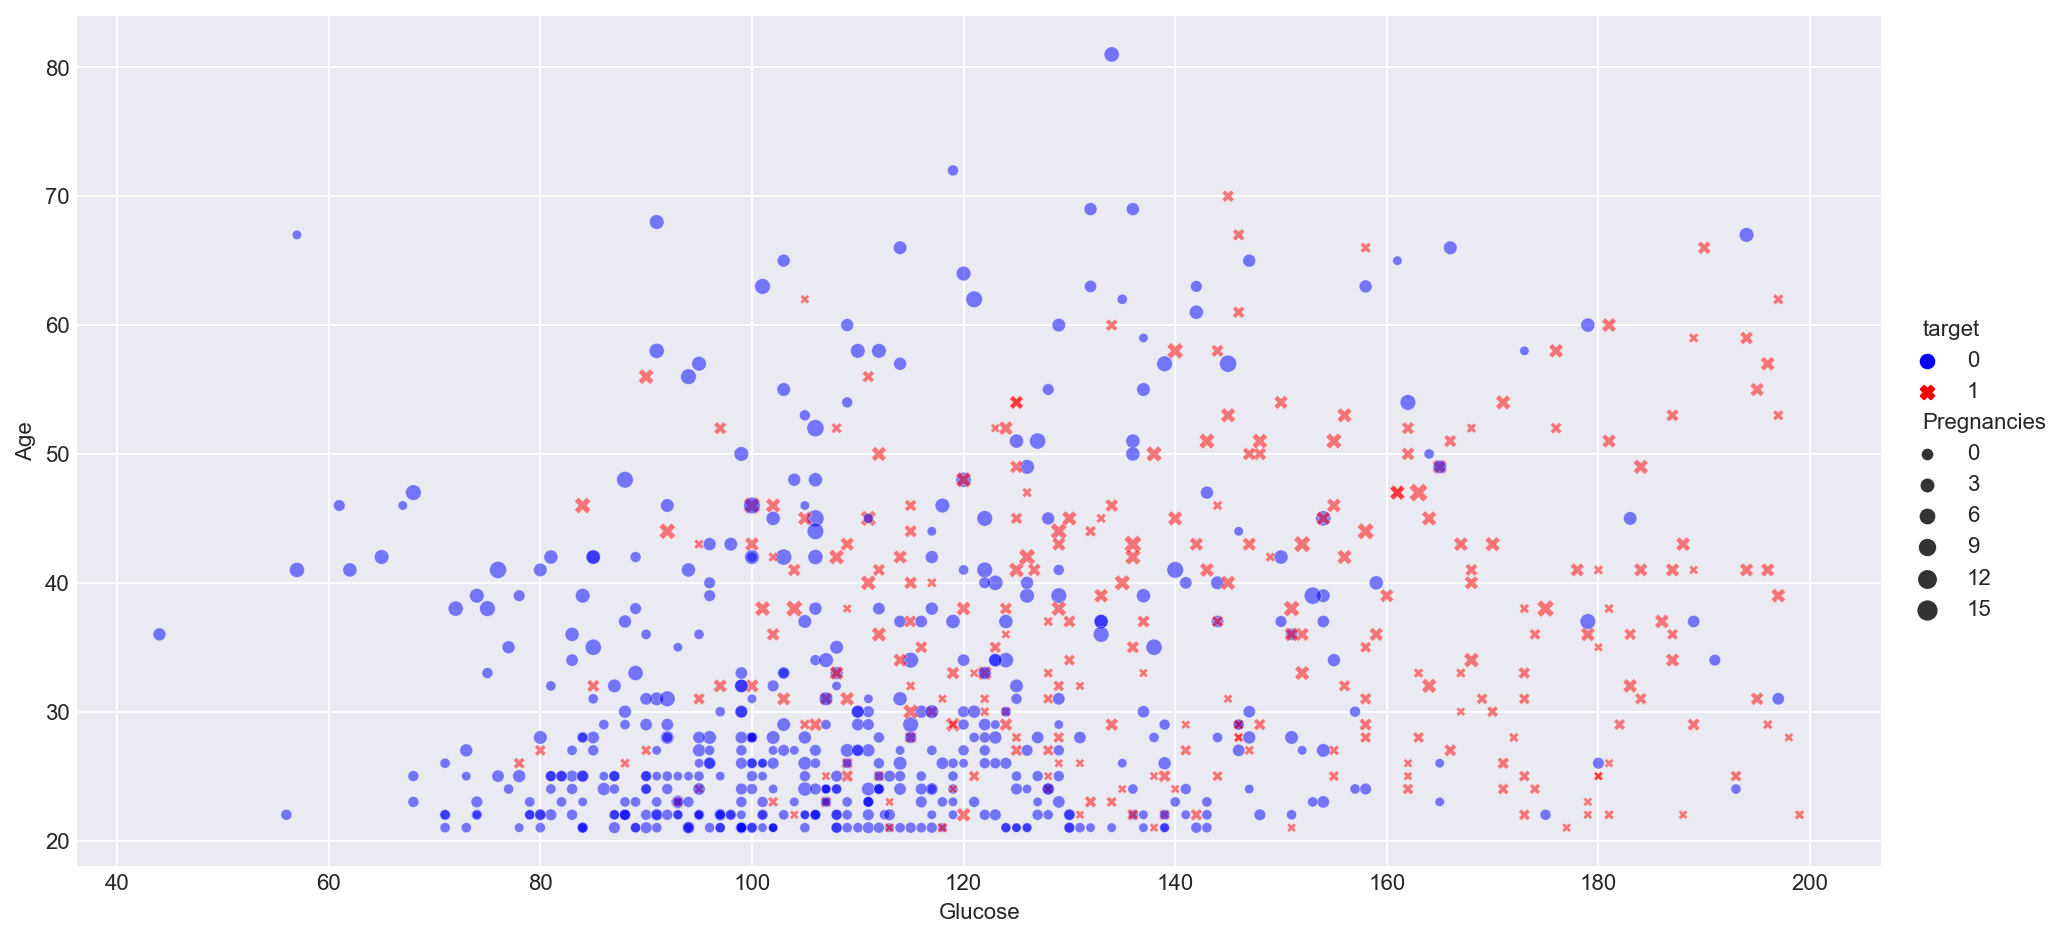

In [19]:
sns.relplot(
    data=df,
    x='Glucose',
    y='Age',
    size='Pregnancies',
    hue='target',
    style='target',
    aspect=2, height=6, alpha=0.5, palette={0:'blue', 1:'red'}
).fig.dpi=160

### *We can observe that incase of lower age groups unless glucose level is on higher side, diabetes chance is lower.</br> Whereas as age increases, chances of diabetes also increase despite sugar levels being moderate*

# **MODELS AND PIPELINES**

### separating features and label

In [20]:
X=df.drop('target', axis=1)
y=df.target

### train test split

In [21]:
# although CV score is being used, this split is needed for making confusion matrix
xtrain,xtest,ytrain,ytest=train_test_split(X,y)

### defining models

In [22]:
model_lr=LogisticRegression() 

model_dt=DecisionTreeClassifier()   

model_rf=RandomForestClassifier()  

model_ada_dt=AdaBoostClassifier()   

model_ada_rf=AdaBoostClassifier(base_estimator=RandomForestClassifier())  

model_gb=GradientBoostingClassifier()

model_svc=SVC(probability=True )   

model_gnb=GaussianNB()

model_knc=KNeighborsClassifier(n_neighbors=5) 

model_rnc=RadiusNeighborsClassifier(radius=20)  

model_xgb=XGBClassifier()  

# dictionary of all models
models={'logistic':model_lr, 'decision tree':model_dt, 'random forest':model_rf, 'adaboost using dt':model_ada_dt, 'adaboost using rf':model_ada_rf,
        'gradboost':model_gb, 'SVC':model_svc, 'Gaussian NB':model_gnb, 'KNC':model_knc, 'RNC':model_rnc, 'xgboost':model_xgb }

### pipeline and scores

LOGISTIC model:

train accuracy: 0.76
test accuracy: 0.79
cross validation f1 score: 0.61

classification report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       132
           1       0.68      0.63      0.66        60

    accuracy                           0.79       192
   macro avg       0.76      0.75      0.75       192
weighted avg       0.79      0.79      0.79       192



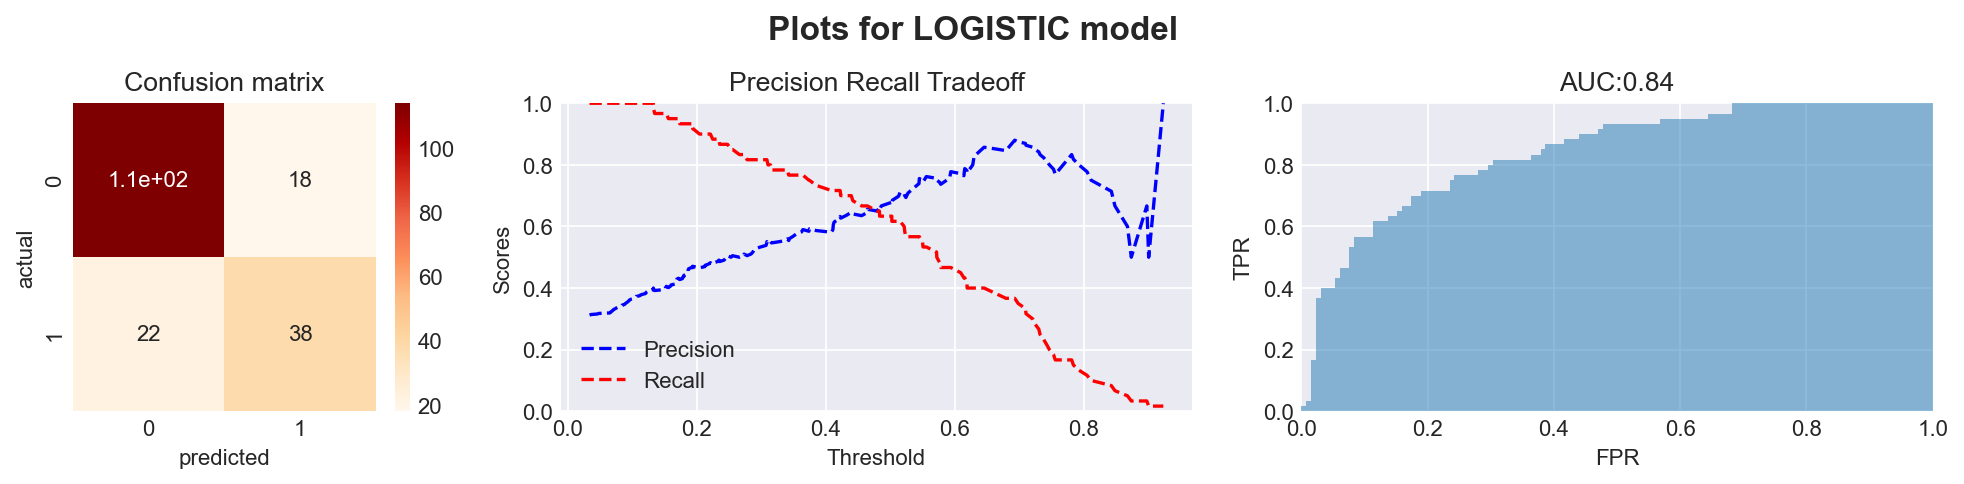

__________________________________________________________________________
DECISION TREE model:

train accuracy: 1.00
test accuracy: 0.69
cross validation f1 score: 0.53

classification report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.77       132
           1       0.50      0.57      0.53        60

    accuracy                           0.69       192
   macro avg       0.65      0.65      0.65       192
weighted avg       0.70      0.69      0.69       192

Feature importance by DECISION TREE:
                          feature_importance
feature                                     
Glucose                             0.281781
BMI                                 0.173914
Age                                 0.143930
DiabetesPedigreeFunction            0.138448
BloodPressure                       0.092096
Insulin                             0.087697
Pregnancies                         0.045434
SkinThickness                       

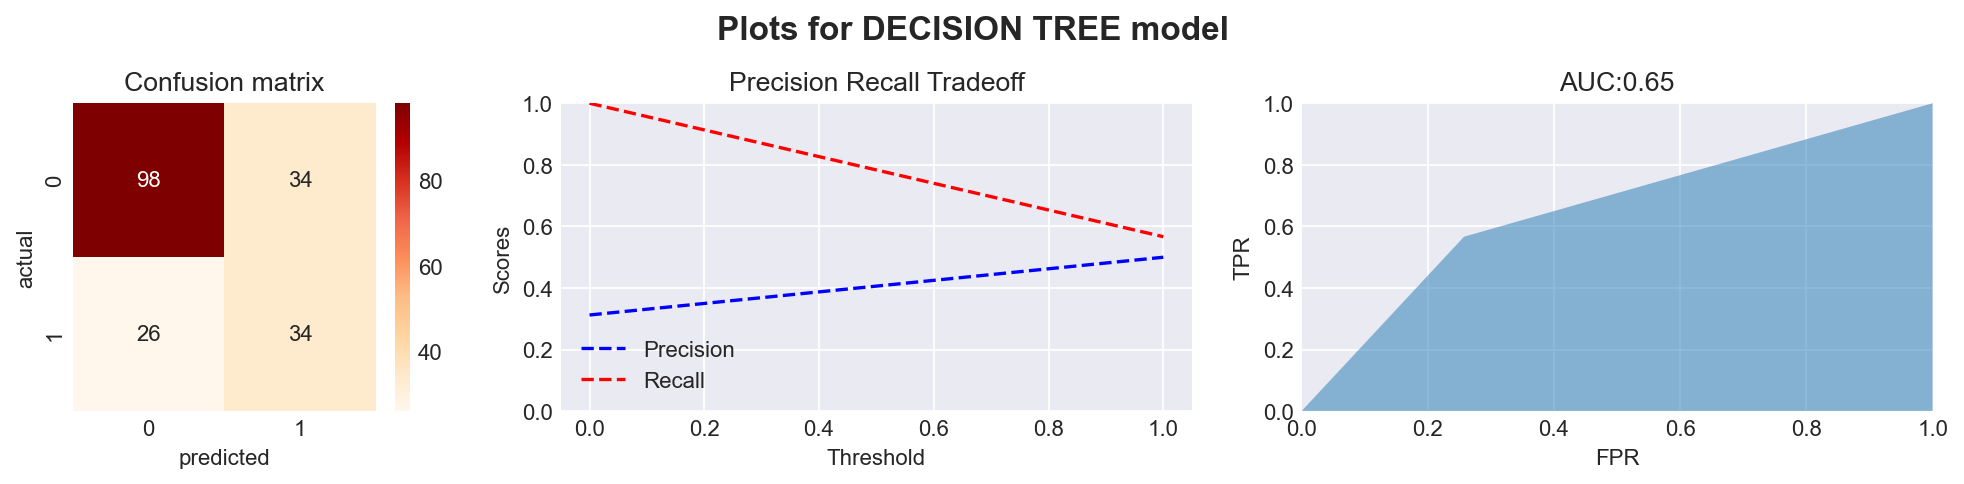

__________________________________________________________________________
RANDOM FOREST model:

train accuracy: 1.00
test accuracy: 0.79
cross validation f1 score: 0.64

classification report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       132
           1       0.67      0.67      0.67        60

    accuracy                           0.79       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.79      0.79      0.79       192

Feature importance by RANDOM FOREST:
                          feature_importance
feature                                     
Glucose                             0.246690
BMI                                 0.154237
Age                                 0.140799
DiabetesPedigreeFunction            0.112352
Insulin                             0.098368
SkinThickness                       0.093437
BloodPressure                       0.082619
Pregnancies                         

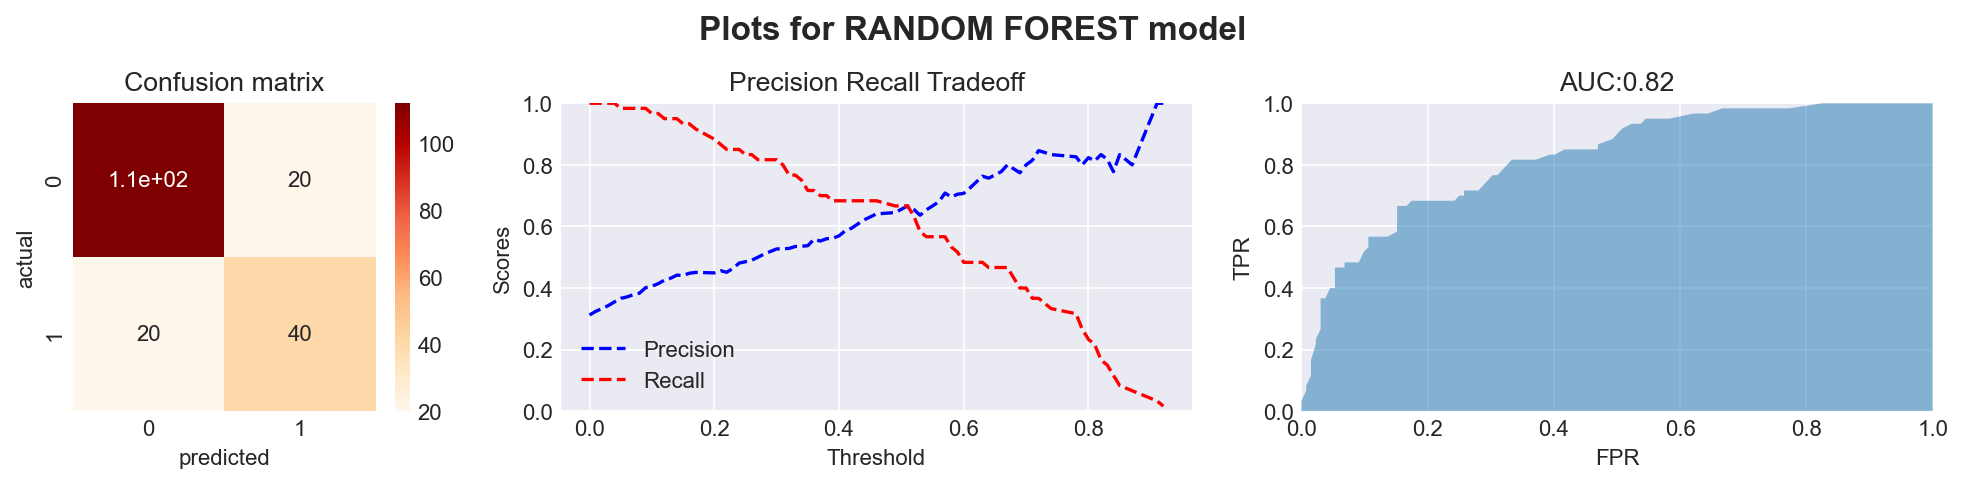

__________________________________________________________________________
ADABOOST USING DT model:

train accuracy: 0.84
test accuracy: 0.78
cross validation f1 score: 0.60

classification report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       132
           1       0.65      0.62      0.63        60

    accuracy                           0.78       192
   macro avg       0.74      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192

Feature importance by ADABOOST USING DT:
                          feature_importance
feature                                     
SkinThickness                           0.20
DiabetesPedigreeFunction                0.18
Glucose                                 0.16
BMI                                     0.14
BloodPressure                           0.12
Age                                     0.10
Insulin                                 0.08
Pregnancies                 

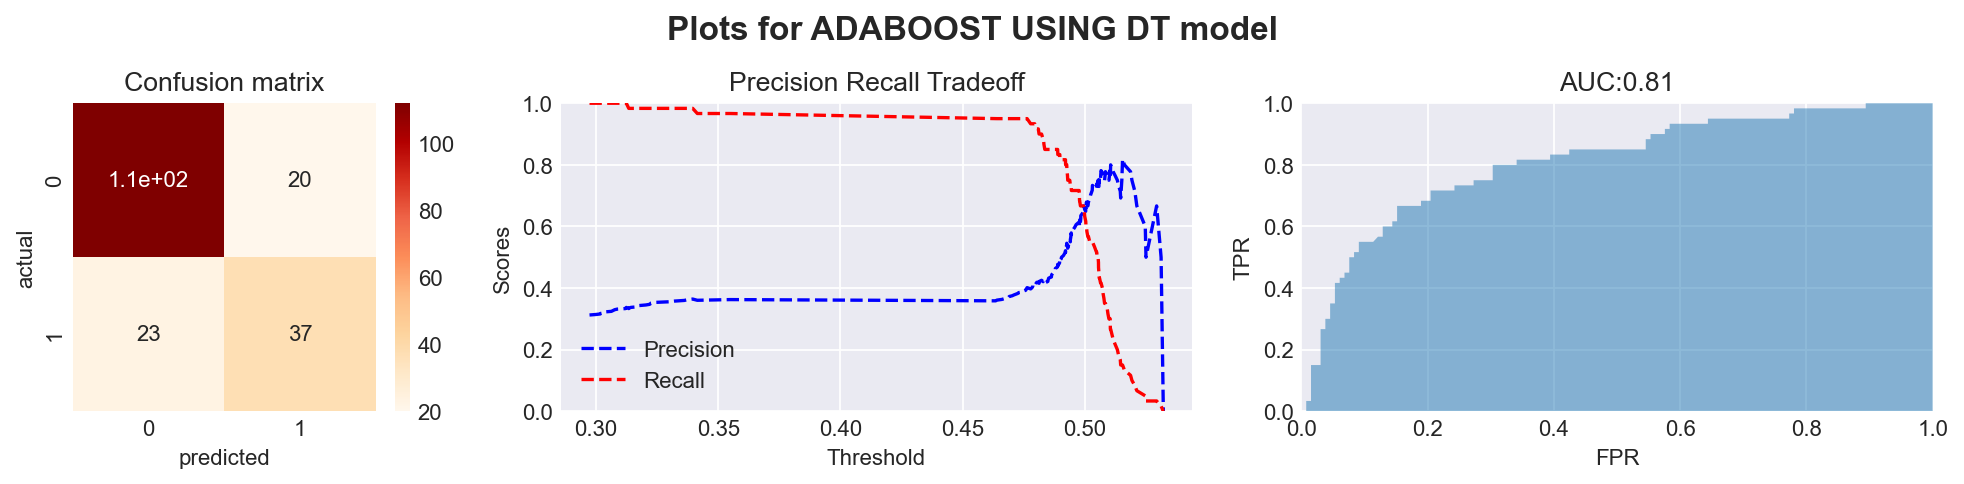

__________________________________________________________________________
ADABOOST USING RF model:

train accuracy: 1.00
test accuracy: 0.77
cross validation f1 score: 0.64

classification report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       132
           1       0.63      0.63      0.63        60

    accuracy                           0.77       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.77      0.77      0.77       192

Feature importance by ADABOOST USING RF:
                          feature_importance
feature                                     
Glucose                             0.244177
BMI                                 0.151772
Age                                 0.147061
DiabetesPedigreeFunction            0.114216
Insulin                             0.095963
SkinThickness                       0.094019
BloodPressure                       0.081416
Pregnancies                 

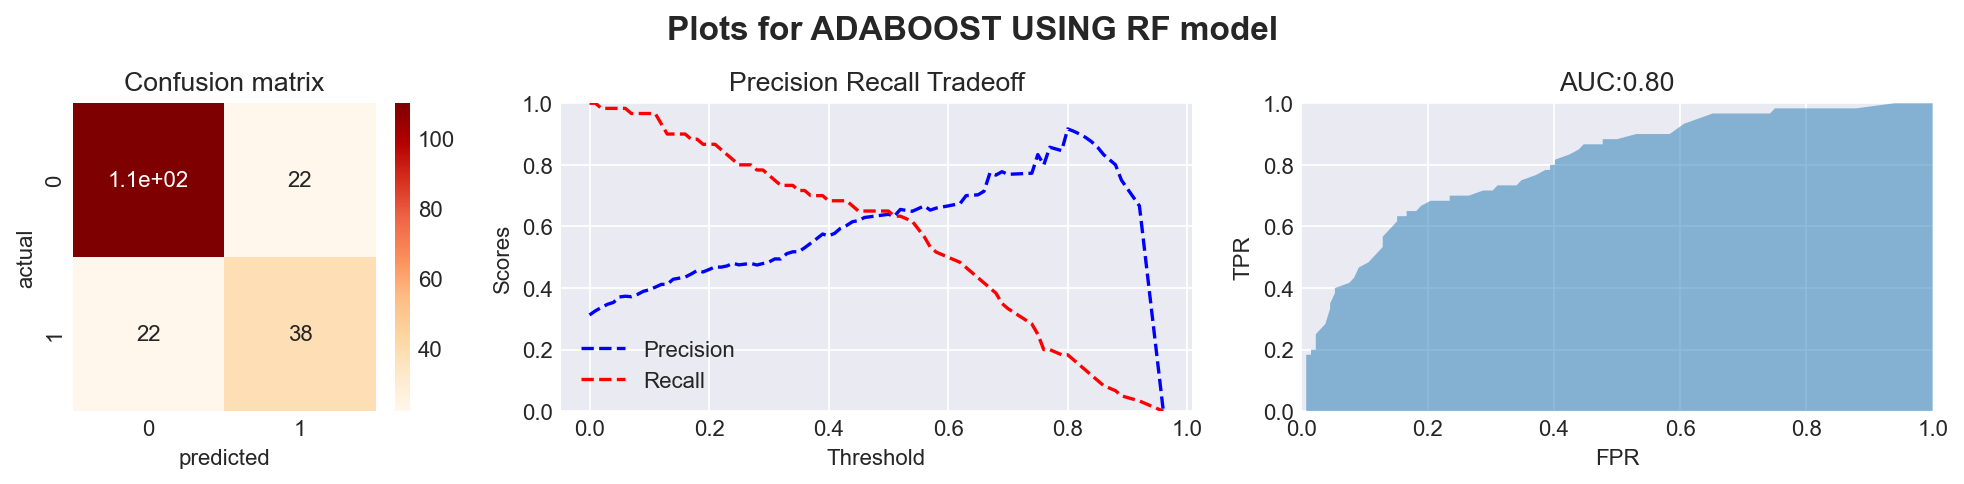

__________________________________________________________________________
GRADBOOST model:

train accuracy: 0.95
test accuracy: 0.77
cross validation f1 score: 0.65

classification report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       132
           1       0.62      0.63      0.63        60

    accuracy                           0.77       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.77      0.77      0.77       192

Feature importance by GRADBOOST:
                          feature_importance
feature                                     
Glucose                             0.343711
BMI                                 0.175682
Age                                 0.163696
DiabetesPedigreeFunction            0.098760
Insulin                             0.069870
SkinThickness                       0.063528
BloodPressure                       0.053940
Pregnancies                         0.030813

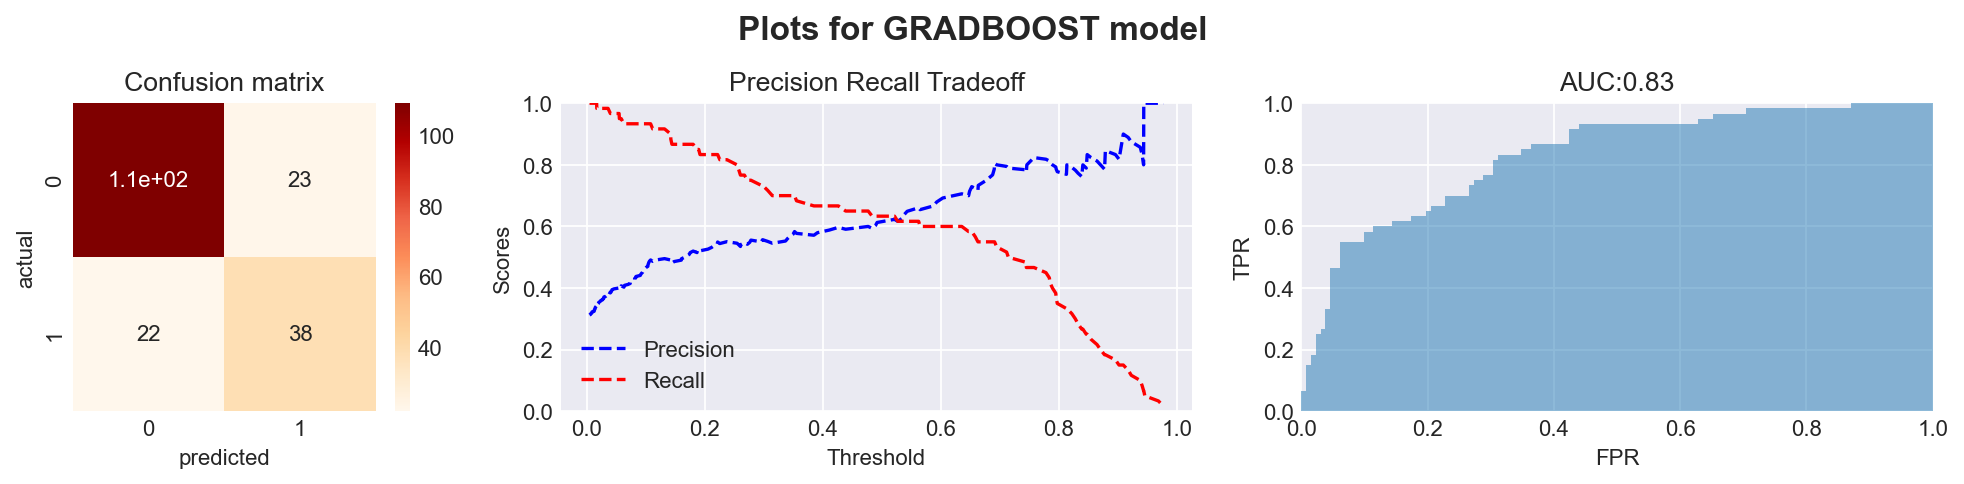

__________________________________________________________________________
SVC model:

train accuracy: 0.81
test accuracy: 0.78
cross validation f1 score: 0.62

classification report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       132
           1       0.67      0.57      0.61        60

    accuracy                           0.78       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



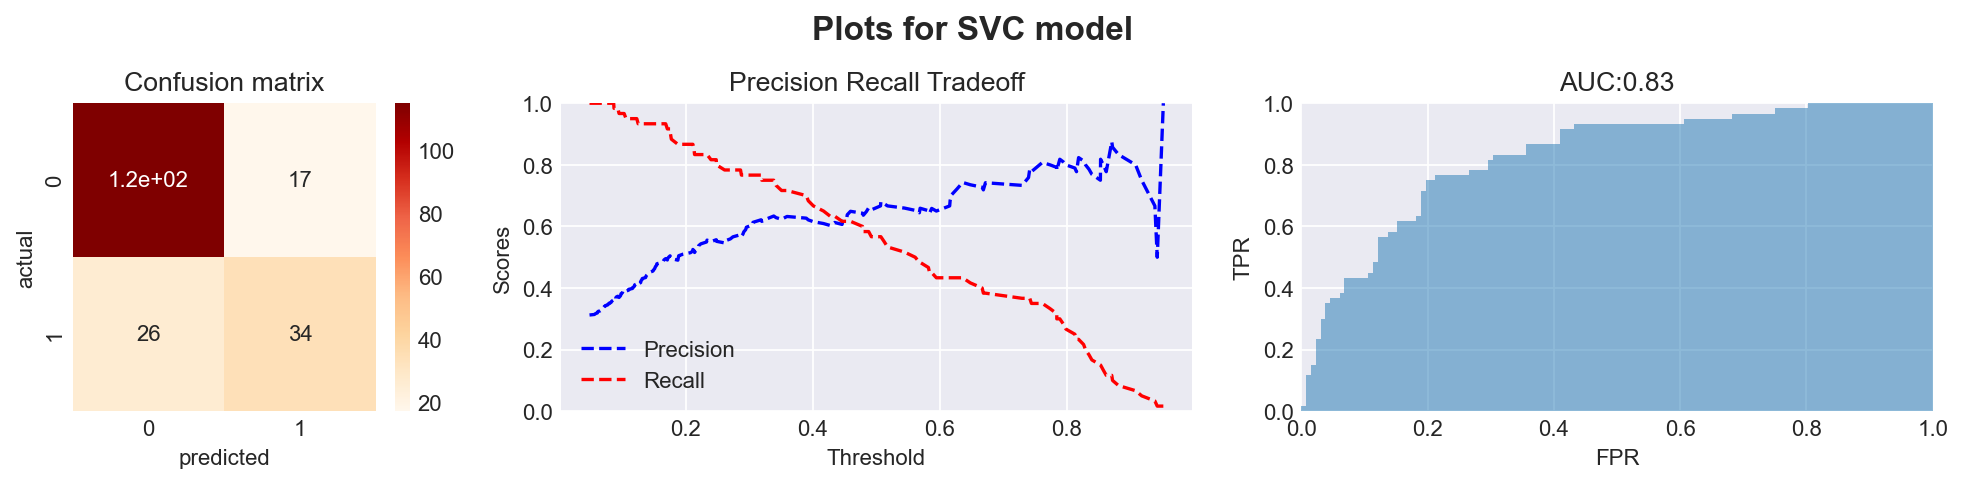

__________________________________________________________________________
GAUSSIAN NB model:

train accuracy: 0.74
test accuracy: 0.77
cross validation f1 score: 0.63

classification report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       132
           1       0.63      0.65      0.64        60

    accuracy                           0.77       192
   macro avg       0.73      0.74      0.74       192
weighted avg       0.77      0.77      0.77       192



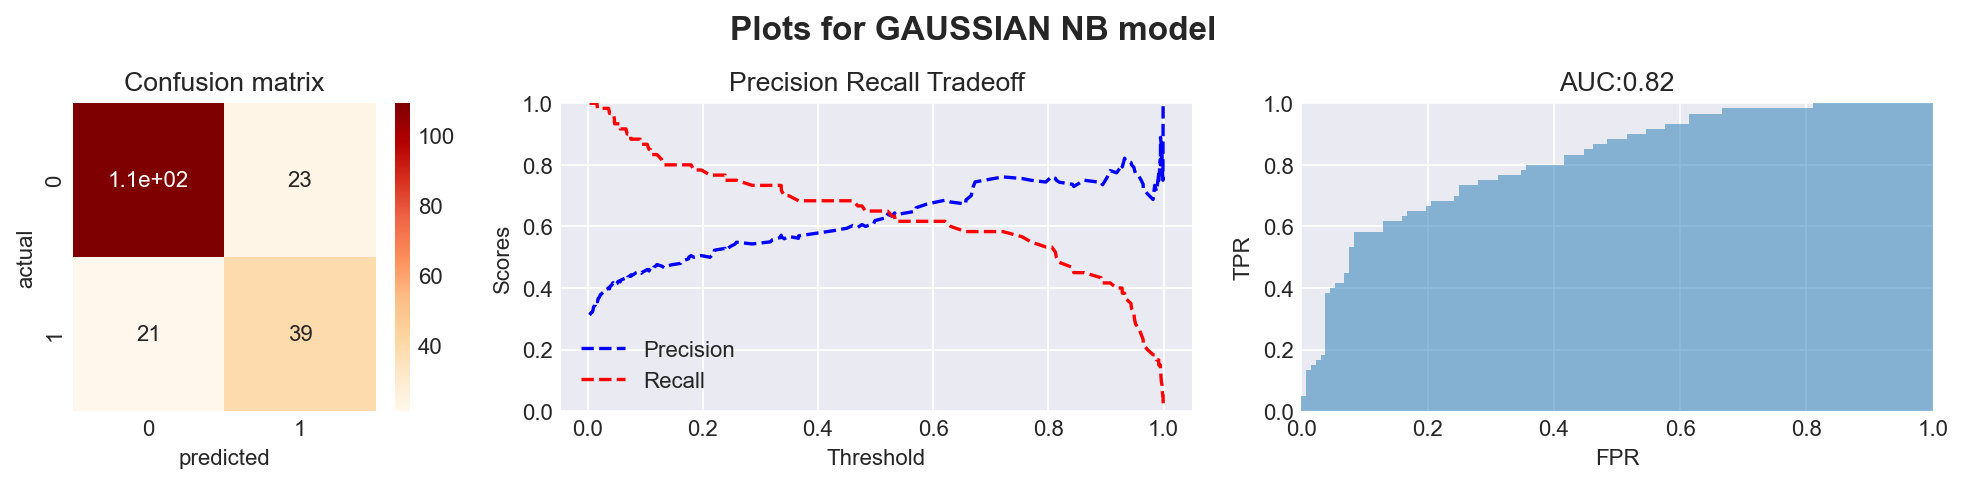

__________________________________________________________________________
KNC model:

train accuracy: 0.82
test accuracy: 0.76
cross validation f1 score: 0.61

classification report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       132
           1       0.63      0.55      0.59        60

    accuracy                           0.76       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.75      0.76      0.76       192



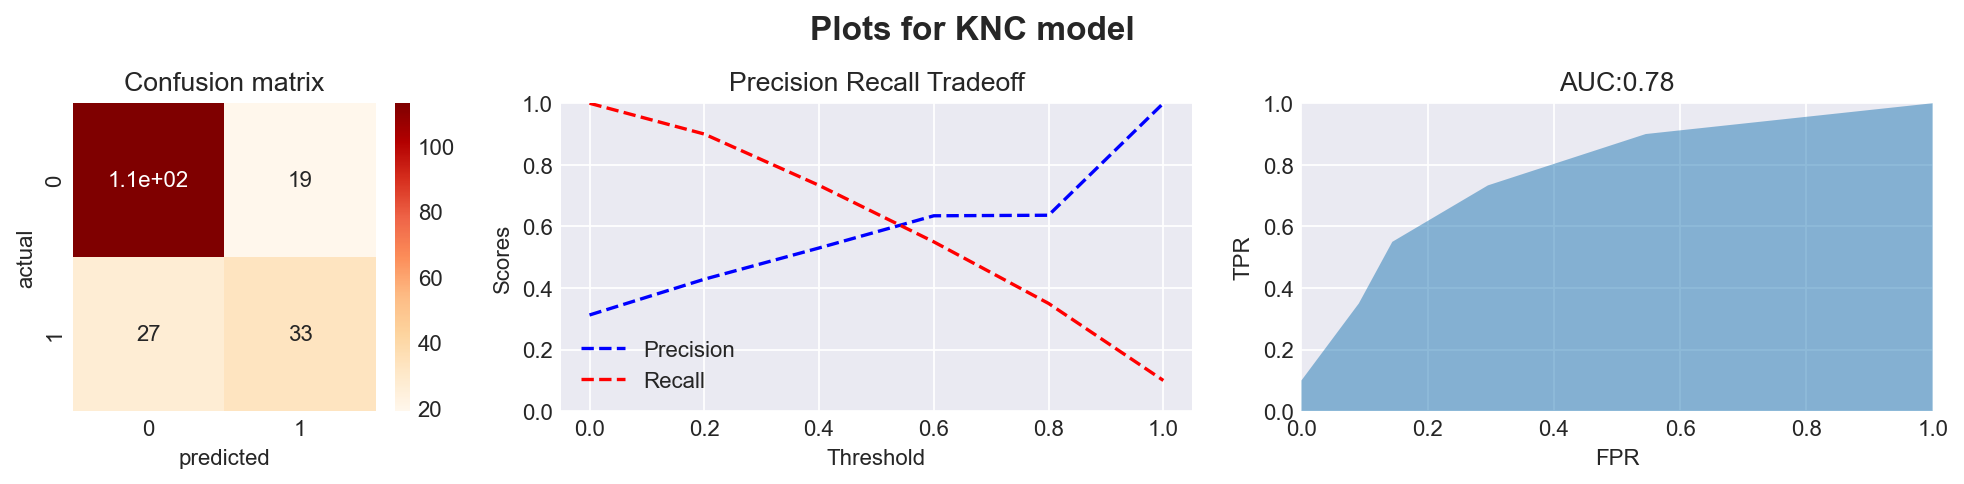

__________________________________________________________________________
RNC model:

train accuracy: 0.64
test accuracy: 0.69
cross validation f1 score: 0.00

classification report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.81       132
           1       0.00      0.00      0.00        60

    accuracy                           0.69       192
   macro avg       0.34      0.50      0.41       192
weighted avg       0.47      0.69      0.56       192



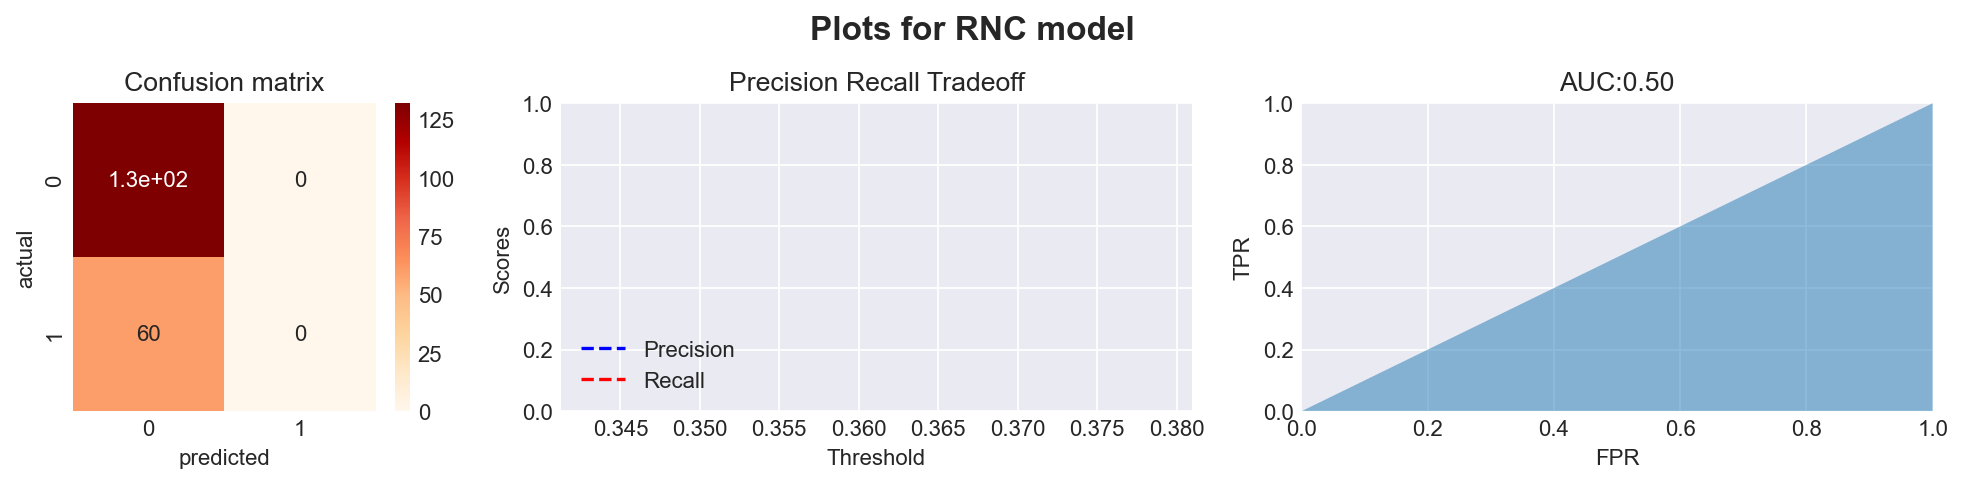

__________________________________________________________________________
XGBOOST model:

train accuracy: 1.00
test accuracy: 0.78
cross validation f1 score: 0.64

classification report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       132
           1       0.64      0.65      0.64        60

    accuracy                           0.78       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.78      0.78      0.78       192

Feature importance by XGBOOST:
                          feature_importance
feature                                     
Glucose                             0.223024
Age                                 0.164078
BMI                                 0.160390
DiabetesPedigreeFunction            0.099207
SkinThickness                       0.099007
Insulin                             0.088887
BloodPressure                       0.085660
Pregnancies                         0.079747


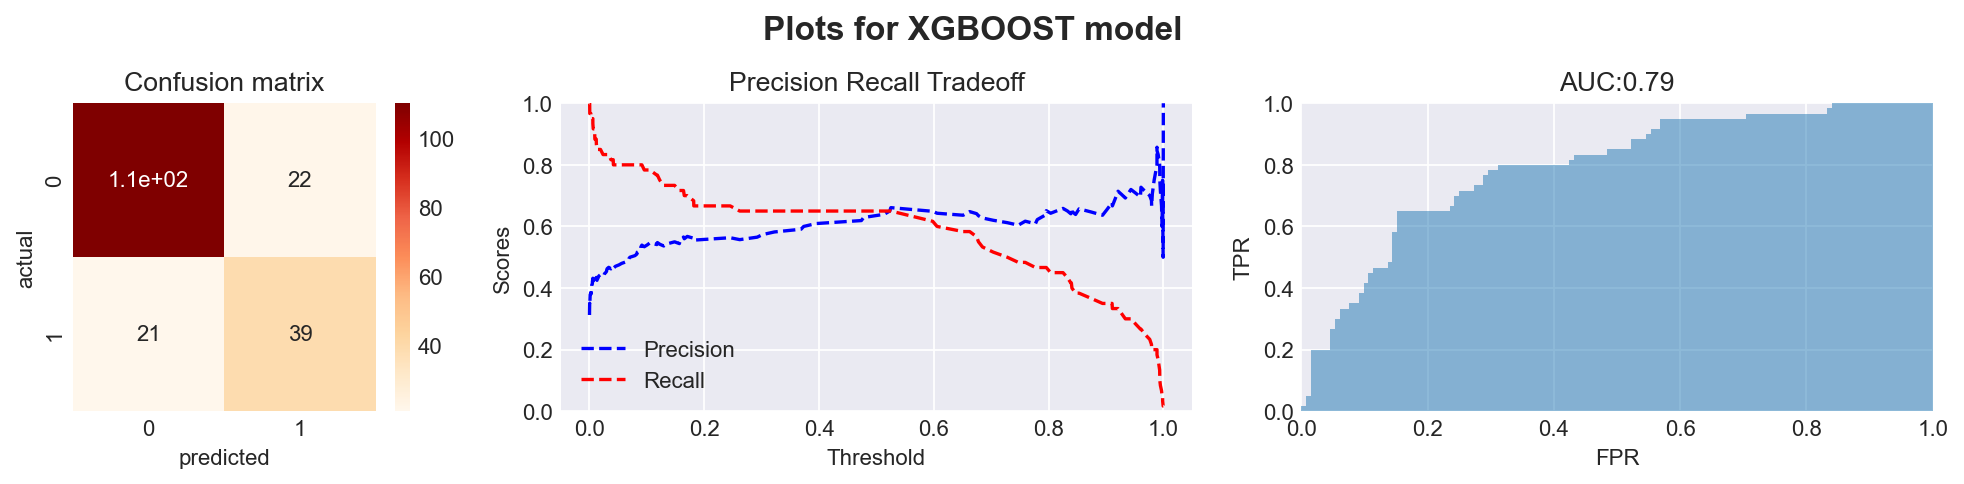

__________________________________________________________________________


In [23]:
# dataframe to store metrics like AUC, f1 score
df_metrics=pd.DataFrame(columns=['f1_score','AUC'] )

for name,model in models.items():
    
    # making pipeline for each model
    pipeline = Pipeline(steps=[( "preprocessor", MinMaxScaler() ),
                               ( "classifier", model )
                              ]
                       )
    
    # print name of pipeline
    print(name.upper(), 'model:\n')
    
    # calculating f1 score and storing
    f1_score_cv=np.mean( cross_val_score(pipeline, X, y, cv=5, scoring='f1') )
    df_metrics.loc[name,'f1_score']=f1_score_cv
    
    # fitting data
    pipeline.fit(xtrain,ytrain)
    
    # printing scores
    print(f'train accuracy: { pipeline.score(xtrain,ytrain) :.2f}' )
    print(f'test accuracy: { pipeline.score(xtest,ytest) :.2f}' )
    print(f'cross validation f1 score: { f1_score_cv :.2f}' )
    print('\nclassification report:\n', classification_report(ytest,pipeline.predict(xtest)) )

    
                    ############ FEATURE IMPORTANCES ##############
    
    if name in ['decision tree', 'random forest', 'adaboost using dt', 'adaboost using rf', 'gradboost', 'xgboost']:
        
        print(f'Feature importance by {name.upper()}:')
        
        feature_importance=pd.DataFrame( 
            data={  
                'FEATURE:' : X.columns,   
                'feature_importance' : pipeline[1].feature_importances_
            }         
        ).set_index('FEATURE:').sort_values('feature_importance', ascending=False) 
        
        print(feature_importance)


                   ############### CALCULATIONS ##################
        
    # pipeline.predict_proba(xtest) is a 2-D array of probability of being labeled as 0 (first column of  array) vs 1 (2nd column in array)
    y_pred_probs=pipeline.predict_proba(xtest)[:,1]
    
    from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score  
    
    '''------------scores vs threshold------------'''
    precision, recall, thresholds = precision_recall_curve(ytest, y_pred_probs) 
    
    
    '''---------------AUC ROC------------------'''
    fpr, tpr, _ = roc_curve(ytest,  y_pred_probs)
    auc = roc_auc_score(ytest, y_pred_probs)
    
    #storing AUC in dataframe
    df_metrics.loc[name,'AUC']=auc
    
    
    
                    ################ PLOTTING ##################
        
    fig, (ax1, ax2, ax3)=plt.subplots(1,3, figsize=(15,2.5), dpi=160, gridspec_kw={'width_ratios': [6, 10, 10]} )  
    
    # confusion matrix
    sns.heatmap( confusion_matrix(ytest,pipeline.predict(xtest)), annot=True, cmap='OrRd', ax=ax1 )
    ax1.set_xlabel('predicted')
    ax1.set_ylabel('actual')
    ax1.set_title('Confusion matrix')
    
    # scores vs threshold
    ax2.plot(thresholds, precision[: -1], "b--", label="Precision")
    ax2.plot(thresholds, recall[: -1], "r--", label="Recall")
    ax2.set_ylabel("Scores")
    ax2.set_xlabel("Threshold")
    ax2.set_title("Precision Recall Tradeoff")
    ax2.legend(loc="lower left")
    ax2.set_ylim([0,1])
    
    # AUC ROC
    ax3.stackplot(fpr, tpr, alpha=0.5)
    ax3.set_title(f'AUC:{ auc :.2f}')
    ax3.set_xlabel('FPR')
    ax3.set_ylabel('TPR')
    ax3.set_xlim(0,1)
    ax3.set_ylim(0,1)
    
    plt.suptitle(f'Plots for {name.upper()} model', fontsize=15, y=1.1, fontweight='bold')
    plt.show()
    
    print('__________________________________________________________________________')
    

### Metrics dataframe

In [24]:
df_metrics

f1_score       AUC
logistic           0.612115  0.840278
decision tree      0.529736  0.654545
random forest      0.638006  0.824369
adaboost using dt   0.59626  0.809533
adaboost using rf  0.643098  0.803725
gradboost          0.652304  0.831944
SVC                0.624848  0.829672
Gaussian NB        0.627612  0.816414
KNC                0.607327  0.777525
RNC                     0.0       0.5
xgboost            0.640132  0.793813

# **Comparing metrics**

### F1 scores comparison

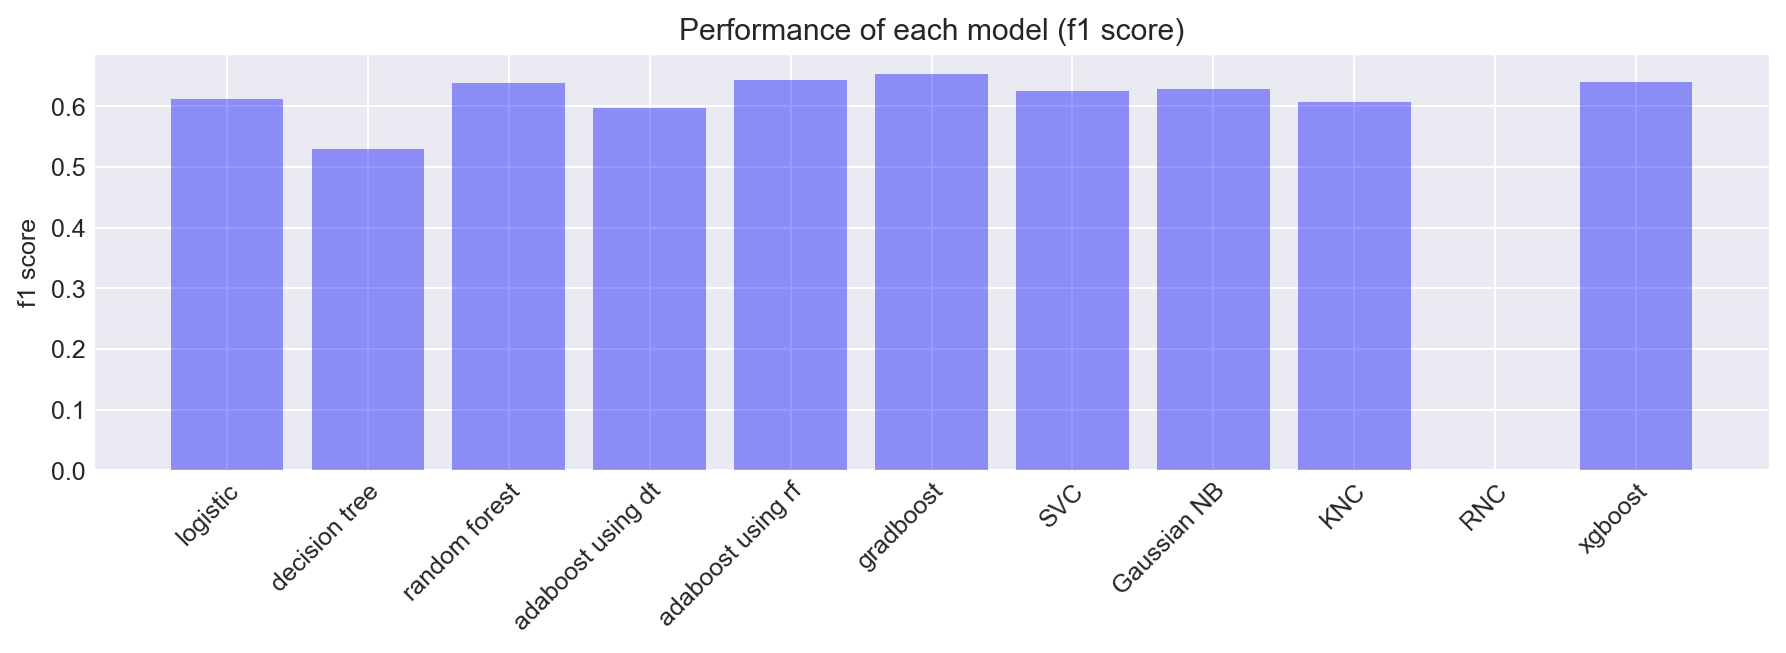

In [25]:
plt.figure(figsize=(12,3), dpi=180)
plt.bar( df_metrics.index, df_metrics.f1_score, color='blue', alpha=0.4)
plt.ylabel('f1 score')
plt.title('Performance of each model (f1 score)')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
plt.show()

### AUC comparison

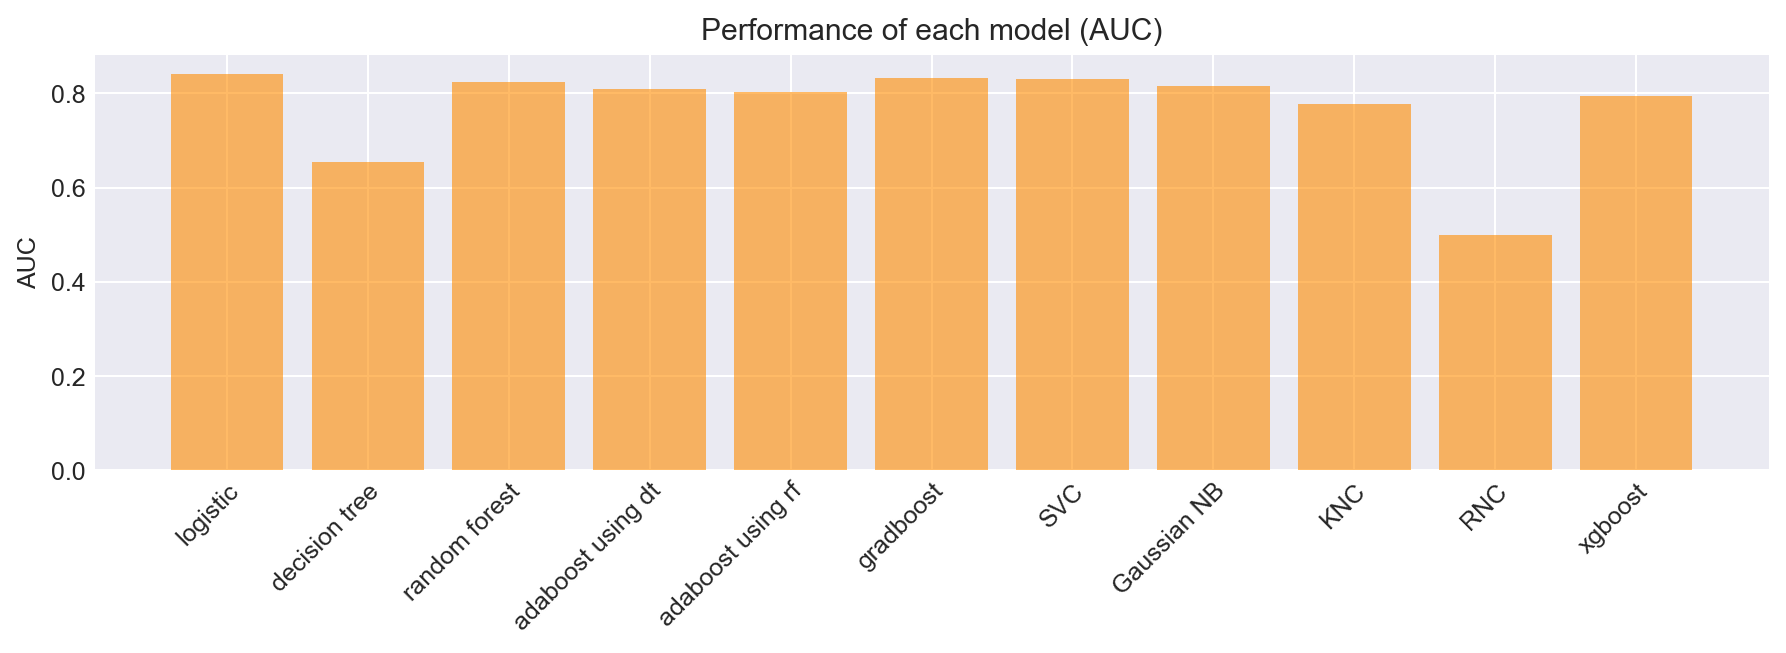

In [26]:
plt.figure(figsize=(12,3), dpi=180)
plt.bar( df_metrics.index, df_metrics.AUC, color='darkorange', alpha=0.6)
plt.ylabel('AUC')
plt.title('Performance of each model (AUC)')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
plt.show()


    most of the models seem to be predicting no diabetes easily
    whereas they are unable to predict diabetes happening
### ***This is mostly due to imbalanced classes and the lower occuring class needs to be balanced***

# **IMBALANCE HANDLING USING SMOTE**